<a href="https://colab.research.google.com/github/deffinpurnama/Analisis-Pengembangan-Data-Analyst-Menjadi-Data-Scientist-Dalam-Perusahaan/blob/main/Analisis_Pengembangan_Data_Analyst_Menjadi_Data_Scientist_Dalam_Perusahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topik : Analisis Pengembangan Data Analyst Menjadi Data Scientist Dalam Perusahaan**

**PENDAHULUAN**

Dalam era bisnis yang berkembang, kesadaran akan peran strategis data semakin penting. Untuk keunggulan kompetitif, perusahaan perlu tidak hanya memiliki data, tetapi juga mengolahnya secara mendalam. Di sinilah peran Data Scientist muncul sebagai solusi, bukan hanya sebagai analis data biasa, melainkan pendorong inovasi yang dapat merancang strategi berdasarkan data dan memprediksi masa depan. Kemampuan ini membuat mereka kunci dalam persaingan bisnis yang ketat.

**LATAR BELAKANG**

Dalam menyadari kebutuhan mendalam di bidang machine learning dan analisis data, perusahaan menghadapi tantangan kekosongan dalam tim Data Scientist. Untuk mengatasi ini, perusahaan memilih pendekatan internal dengan memfokuskan pada pengembangan keterampilan Data Analyst yang telah ada. Penguatan keterampilan Data Analyst menjadi solusi efisien dan berkelanjutan. Melalui pelatihan yang disesuaikan, perusahaan tidak hanya meningkatkan kapasitas analisis data, tetapi juga mengurangi pengeluaran yang terkait dengan perekrutan eksternal.

**HIPOTESIS PERTANYAAN**

1. Apa perbedaan antara Data Scientist dan Data Analyst?
2. Skill apa saja yang dibutuhkan seorang Data Analyst guna memiliki kemampuan yang setara dengan Data Scientist?

**TUJUAN ANALISIS**

Analisis ini dilakukan dengan tujuan memberikan pandangan yang berharga kepada perusahaan yang berencana memberikan pelatihan kepada para Data Analyst di organisasi mereka. Analisis ini bertujuan untuk membantu Data Analyst agar dapat mengembangkan keterampilan yang sejajar dengan seorang Data Scientist. Dengan pemahaman yang lebih mendalam tentang keterampilan dan alat yang umum digunakan oleh Data Scientist, perusahaan dapat merancang program pelatihan yang lebih terfokus dan sesuai dengan kebutuhan evolusi peran Data Analyst menuju peran yang lebih maju dan kompleks.

**NOTE**

Pada analisis yang saya lakukan, saya hanya menggunakan responden data pekerja ('Q5' == 'No') dan juga responden yang bekerja sebagai Data Scientist dan Data Analyst ( ['Q23' == 'Data Scientist'] & [ 'Q23' == 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'] ).

**PERTANYAAN YANG DIGUNAKAN**

1. Are you currently a student? (high school, university, or graduate)? (Q5)
2. What programming languages do you use on a regular basis? (Q12)
3. Do you use any of the following data visualization libraries on a regular basis? (Q15)
4. Which of the following machine learning frameworks do you use on a regular basis? (Q17)
5. Which of the following ML algorithms do you use on a regular basis? (Q18)
6. Select any activities that make up an important part of your role at work (Q28)
7. Which of the following cloud computing platforms do you use? (Q31)
8. Do you use any of the following data products (relational databases, data warehouses, data lakes,or similar)? (Q35)
9. Do you use any of the following business intelligence tools? (Q36)

Sumber : https://www.kaggle.com/competitions/kaggle-survey-2022/overview


# **Data Preprocessing**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Ambil Data
try:
    # membuat file bernama data
    !mkdir data
    # Download file csv dari github
    !wget -P data/ https://raw.githubusercontent.com/DeffinP/DataMining/main/kaggle_survey_2022_responses.csv # Mengimport data dari github ke google colab
    data = pd.read_csv("data/kaggle_survey_2022_responses.csv")
except Exception as e:
    print(f"Error: {e}")

mkdir: cannot create directory ‘data’: File exists
--2023-11-25 13:37:26--  https://raw.githubusercontent.com/DeffinP/DataMining/main/kaggle_survey_2022_responses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26018685 (25M) [text/plain]
Saving to: ‘data/kaggle_survey_2022_responses.csv.2’

kaggle_survey_2022_ 100%[===================>]  24.81M  --.-KB/s    in 0.1s    

2023-11-25 13:37:26 (185 MB/s) - ‘data/kaggle_survey_2022_responses.csv.2’ saved [26018685/26018685]



<ipython-input-68-13c7ce791da8>:7: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/kaggle_survey_2022_responses.csv")


In [ ]:
# Cek Data Duplicate
duplikat = data[data.duplicated()]
print(duplikat)

Empty DataFrame
Columns: [Duration (in seconds), Q2, Q3, Q4, Q5, Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, Q6_6, Q6_7, Q6_8, Q6_9, Q6_10, Q6_11, Q6_12, Q7_1, Q7_2, Q7_3, Q7_4, Q7_5, Q7_6, Q7_7, Q8, Q9, Q10_1, Q10_2, Q10_3, Q11, Q12_1, Q12_2, Q12_3, Q12_4, Q12_5, Q12_6, Q12_7, Q12_8, Q12_9, Q12_10, Q12_11, Q12_12, Q12_13, Q12_14, Q12_15, Q13_1, Q13_2, Q13_3, Q13_4, Q13_5, Q13_6, Q13_7, Q13_8, Q13_9, Q13_10, Q13_11, Q13_12, Q13_13, Q13_14, Q14_1, Q14_2, Q14_3, Q14_4, Q14_5, Q14_6, Q14_7, Q14_8, Q14_9, Q14_10, Q14_11, Q14_12, Q14_13, Q14_14, Q14_15, Q14_16, Q15_1, Q15_2, Q15_3, Q15_4, Q15_5, Q15_6, Q15_7, Q15_8, Q15_9, Q15_10, Q15_11, Q15_12, Q15_13, Q15_14, Q15_15, Q16, Q17_1, Q17_2, Q17_3, Q17_4, Q17_5, Q17_6, Q17_7, Q17_8, Q17_9, ...]
Index: []

[0 rows x 296 columns]


In [ ]:
# Menghapus kolom pertama (Q1)
data = data.drop(data.columns[0], axis=1)
data.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
# Data Yang Dipakai
data = data.iloc[1:,:]
data.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
# Mencari semua data survey seseorang yang bekerja sebagai Data Scientist dan Data Analyst

# Hanya mengambil Q5 yang bernilai 'No'
df = data[data['Q5']=='No']

# Data Scientist
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS = df[df['Q23']== 'Data Scientist']

# Data Analyst
# hanya mengambil Q23 yang bernilai 'Data Analyst'
df2_DA = df[df['Q23']== 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)']

# **Data Scientist dan Data Analyst**



**Responden Data Scientist dan Data Analyst**



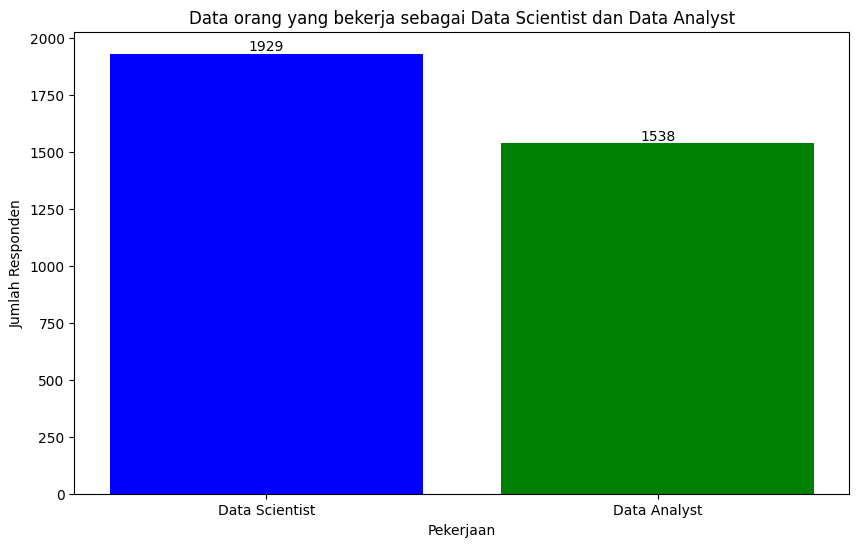

In [ ]:
# Mencari jumlah orang yang bekerja sebagai Data Scientist dan Data Analyst
dat_sci_count = data[(data['Q5'] == 'No') & (data['Q23'] == 'Data Scientist')].shape[0]
dat_ayt_count = data[(data['Q5'] == 'No') & (data['Q23'] == 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)')].shape[0]

# Membuat histogram
plt.figure(figsize=(10, 6))

# Plotting bar untuk Data Scientist dan Data Analyst dengan penambahan label
bar_plot = plt.bar(['Data Scientist', 'Data Analyst'], [dat_sci_count, dat_ayt_count], color=['blue', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Data orang yang bekerja sebagai Data Scientist dan Data Analyst')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Responden')

# Menambahkan label pada setiap batang histogram
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Perbedaan Data Scientist dan Data Analyst**

In [ ]:
# Data Peran Data Scientist dalam pekerjaan
Q28_1 = df2_DS['Q28_1'].value_counts()
Q28_2 = df2_DS['Q28_2'].value_counts()
Q28_3 = df2_DS['Q28_3'].value_counts()
Q28_4 = df2_DS['Q28_4'].value_counts()
Q28_5 = df2_DS['Q28_5'].value_counts()
Q28_6 = df2_DS['Q28_6'].value_counts()
Q28_7 = df2_DS['Q28_7'].value_counts()
Q28_8 = df2_DS['Q28_8'].value_counts()

# Gabungan Peran Data Scientist dalam pekerjaan
Q28_DS_Concat = pd.concat([Q28_1, Q28_2, Q28_3, Q28_4, Q28_5,
    Q28_6, Q28_7, Q28_8,
])

# Data Peran Data Analyst dalam pekerjaan
Q28_1_DA = df2_DA['Q28_1'].value_counts()
Q28_2_DA = df2_DA['Q28_2'].value_counts()
Q28_3_DA = df2_DA['Q28_3'].value_counts()
Q28_4_DA = df2_DA['Q28_4'].value_counts()
Q28_5_DA = df2_DA['Q28_5'].value_counts()
Q28_6_DA = df2_DA['Q28_6'].value_counts()
Q28_7_DA = df2_DA['Q28_7'].value_counts()
Q28_8_DA = df2_DA['Q28_8'].value_counts()

# Gabungan Peran Data Analyst dalam pekerjaan
Q28_DA_Concat = pd.concat([Q28_1_DA,Q28_2_DA,Q28_3_DA,Q28_4_DA,Q28_5_DA,
    Q28_6_DA,Q28_7_DA,Q28_8_DA,
])

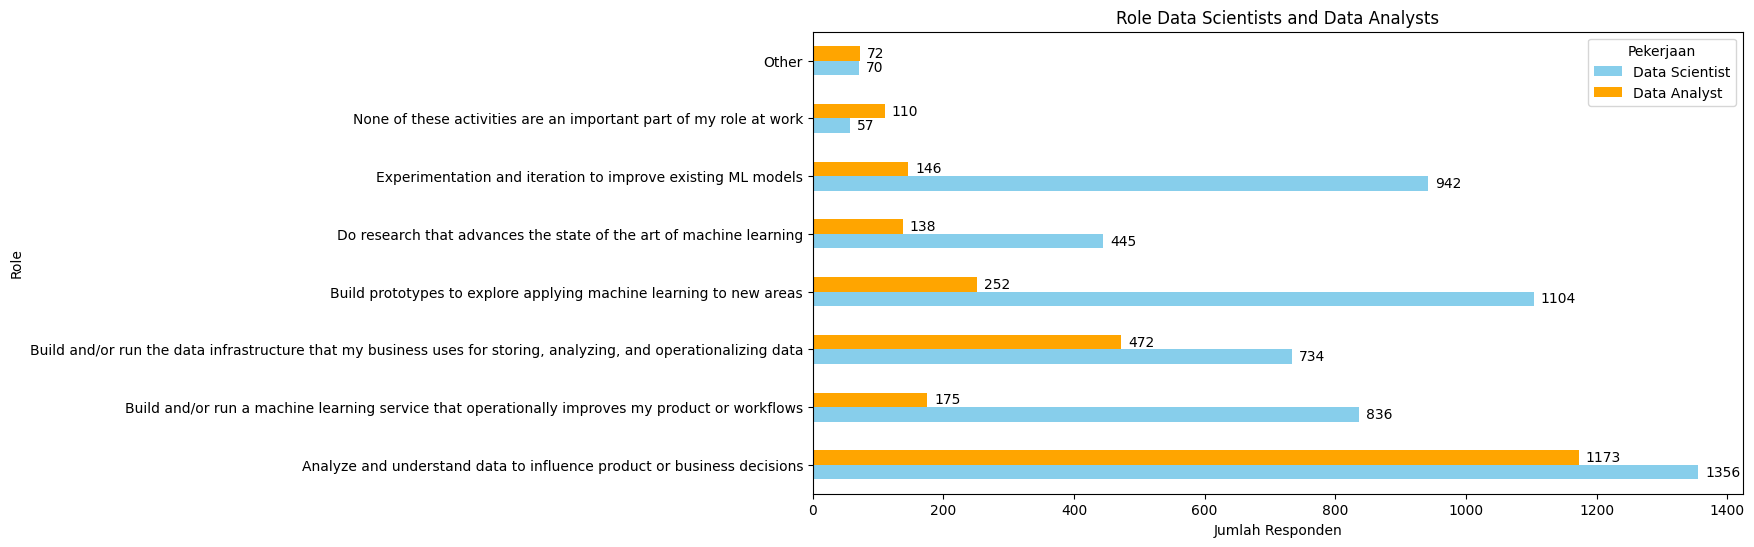

In [ ]:
# Create a DataFrame for Data Scientist and Data Analyst responses
df_ds = pd.DataFrame({'Data Scientist': Q28_DS_Concat, 'Data Analyst': Q28_DA_Concat})

# Sort the values
df_ds = df_ds.sort_index()

# Plotting horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df_ds.plot(kind='barh', ax=ax, color=['skyblue', 'orange'])

# Add actual values on the right of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', xytext=(5, 0), textcoords='offset points')

# Add labels and title
ax.set_xlabel('Jumlah Responden')
ax.set_ylabel('Role')
ax.set_title('Role Data Scientists and Data Analysts')

plt.legend(title='Pekerjaan')
plt.show()

**Interpretasi :**

Dari grouped bar chart diatas didapat beberapa point:


1.   Data scientist memiliki peran kunci dalam mengembangkan prototipe untuk mengeksplorasi penerapan pembelajaran mesin (ML) ke area baru, menunjukkan bahwa keahlian ML menjadi aspek penting dalam tugas mereka.
2.   Terdapat fokus yang signifikan pada eksperimen dan iterasi dalam tugas data scientist untuk meningkatkan model ML yang sudah ada. Hal ini menunjukkan bahwa data scientist tidak hanya membangun model, tetapi juga terlibat dalam pengembangan dan peningkatan berkelanjutan.
3.   Ditemukan bahwa data scientist memiliki peran dalam membangun layanan pembelajaran mesin yang dapat meningkatkan produk atau alur kerja secara operasional. Ini menandakan bahwa data scientist tidak hanya terlibat dalam tugas pengembangan model, tetapi juga berperan dalam implementasi dan operasionalisasi solusi ML.

Dengan demikian, perbedaan signifikan antara data scientist dan data analyst dapat dilihat dari kebutuhan yang sangat tinggi terhadap keahlian **Machine Learning** dalam pekerjaan data scientist, Sementara data analyst mungkin lebih fokus pada **analisis data dan pelaporan**.


# **Skill Set Yang Diperlukan Data Scientist**

## Programming Languages

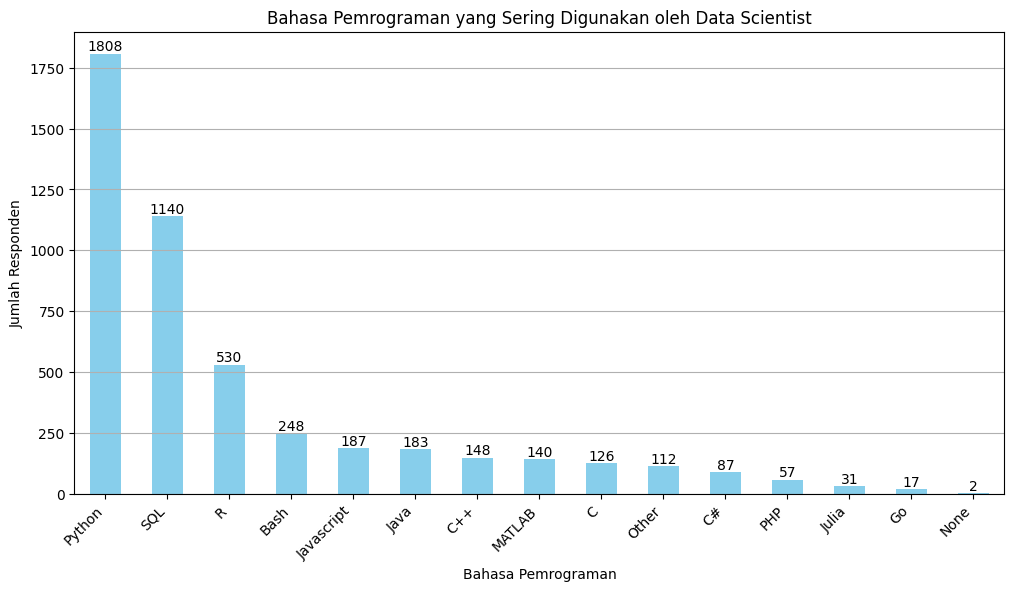

In [ ]:
# Data Scientist

# Gabungan Bahasa Pemrograman Data Scientist
Q12_1 = df2_DS['Q12_1'].value_counts()
Q12_2 = df2_DS['Q12_2'].value_counts()
Q12_3 = df2_DS['Q12_3'].value_counts()
Q12_4 = df2_DS['Q12_4'].value_counts()
Q12_5 = df2_DS['Q12_5'].value_counts()
Q12_6 = df2_DS['Q12_6'].value_counts()
Q12_7 = df2_DS['Q12_7'].value_counts()
Q12_8 = df2_DS['Q12_8'].value_counts()
Q12_9 = df2_DS['Q12_9'].value_counts()
Q12_10 = df2_DS['Q12_10'].value_counts()
Q12_11 = df2_DS['Q12_11'].value_counts()
Q12_12 = df2_DS['Q12_12'].value_counts()
Q12_13 = df2_DS['Q12_13'].value_counts()
Q12_14 = df2_DS['Q12_14'].value_counts()
Q12_15 = df2_DS['Q12_15'].value_counts()

Q12_DS_Concat = pd.concat([Q12_1, Q12_2, Q12_3, Q12_4, Q12_5,
    Q12_6, Q12_7, Q12_8, Q12_9, Q12_10,
    Q12_11, Q12_12, Q12_13, Q12_14, Q12_15,
])

# Mengurutkan Q12_DS_Concat dari terbesar ke terkecil
Q12_DS_Concat_sorted = Q12_DS_Concat.sort_values(ascending=False)

# Membuat histogram dari Q12_DS_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q12_DS_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Bahasa Pemrograman yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Bahasa Pemrograman')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q12_DS_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Python** dan **SQL** merupakan bahasa pemrograman yang sering di gunakan oleh Data Scientist

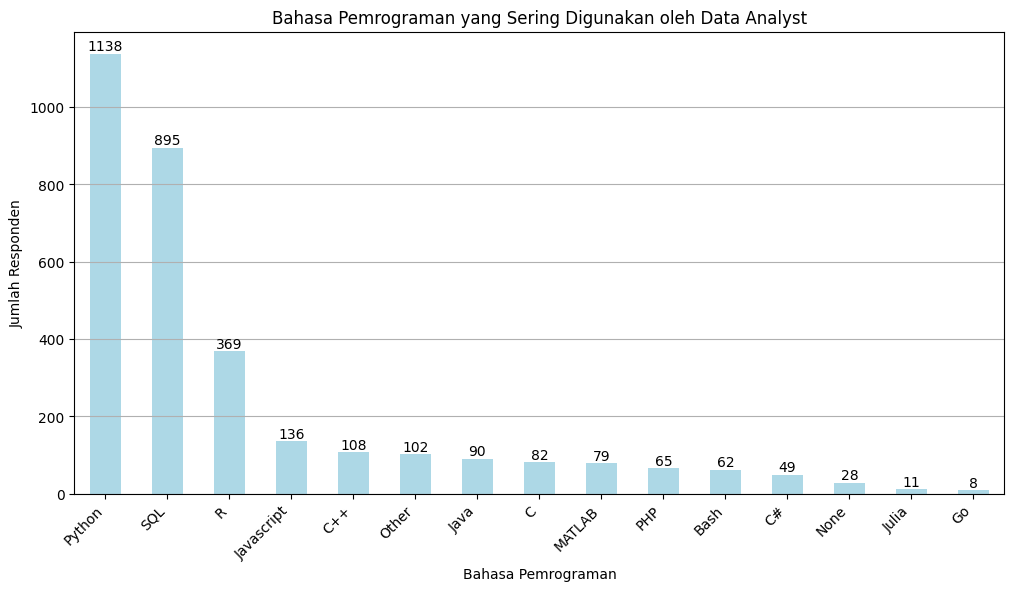

In [ ]:
# Data Analyst

# Gabungan Bahasa Pemrograman Data Analyst
Q12_1_DA = df2_DA['Q12_1'].value_counts()
Q12_2_DA = df2_DA['Q12_2'].value_counts()
Q12_3_DA = df2_DA['Q12_3'].value_counts()
Q12_4_DA = df2_DA['Q12_4'].value_counts()
Q12_5_DA = df2_DA['Q12_5'].value_counts()
Q12_6_DA = df2_DA['Q12_6'].value_counts()
Q12_7_DA = df2_DA['Q12_7'].value_counts()
Q12_8_DA = df2_DA['Q12_8'].value_counts()
Q12_9_DA = df2_DA['Q12_9'].value_counts()
Q12_10_DA = df2_DA['Q12_10'].value_counts()
Q12_11_DA = df2_DA['Q12_11'].value_counts()
Q12_12_DA = df2_DA['Q12_12'].value_counts()
Q12_13_DA = df2_DA['Q12_13'].value_counts()
Q12_14_DA = df2_DA['Q12_14'].value_counts()
Q12_15_DA = df2_DA['Q12_15'].value_counts()

Q12_DA_Concat = pd.concat([Q12_1_DA, Q12_2_DA, Q12_3_DA, Q12_4_DA, Q12_5_DA,
    Q12_6_DA, Q12_7_DA, Q12_8_DA, Q12_9_DA, Q12_10_DA,
    Q12_11_DA, Q12_12_DA, Q12_13_DA, Q12_14_DA, Q12_15_DA,
])

# Mengurutkan Q12_DA_Concat dari terbesar ke terkecil
Q12_DA_Concat_sorted = Q12_DA_Concat.sort_values(ascending=False)

# Membuat histogram dari Q12_DA_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q12_DA_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Bahasa Pemrograman yang Sering Digunakan oleh Data Analyst')
plt.xlabel('Bahasa Pemrograman')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q12_DA_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Python** dan **SQL** merupakan bahasa pemrograman yang sering di gunakan oleh Data Analyst

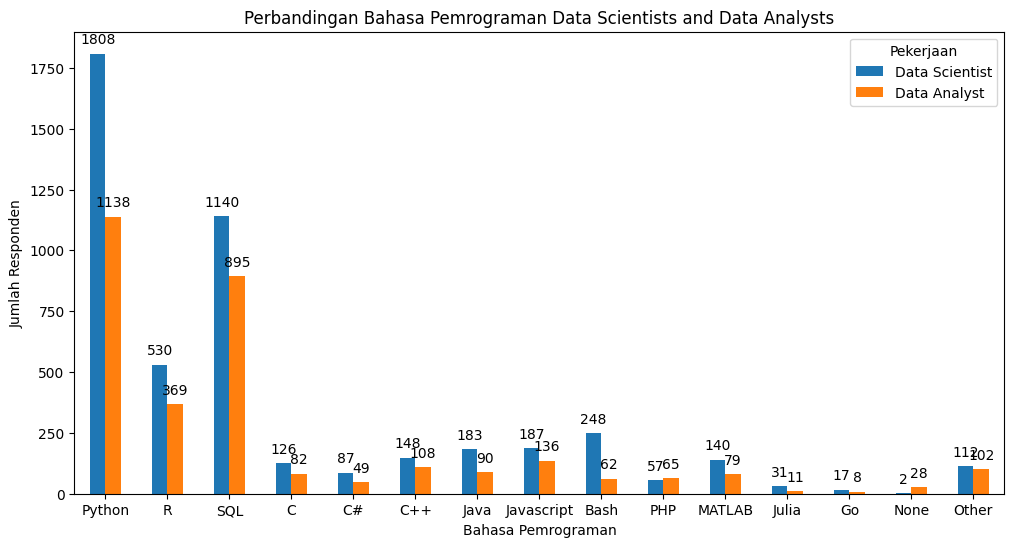

In [ ]:
# Create a DataFrame for Data Scientist and Data Analyst responses
df_ds = pd.DataFrame({'Data Scientist': Q12_DS_Concat, 'Data Analyst': Q12_DA_Concat})

# Grouped Bar
ax = df_ds.plot(kind='bar', rot=0, figsize=(12, 6))
ax.set_ylabel('Jumlah Responden')
ax.set_xlabel('Bahasa Pemrograman')
ax.set_title('Perbandingan Bahasa Pemrograman Data Scientists and Data Analysts')

# Nilai Asli diatasnya
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Pekerjaan')
plt.show()

**Interpretasi :**


*   Dari visualisasi grouped bar di atas, terlihat bahwa dalam penggunaan bahasa pemrograman baik data scientist maupun data analyst menggunakan **Python** dan **SQL** sebagai bahasa pemrograman yang sering di gunakan

##  Data Visualization Libraries

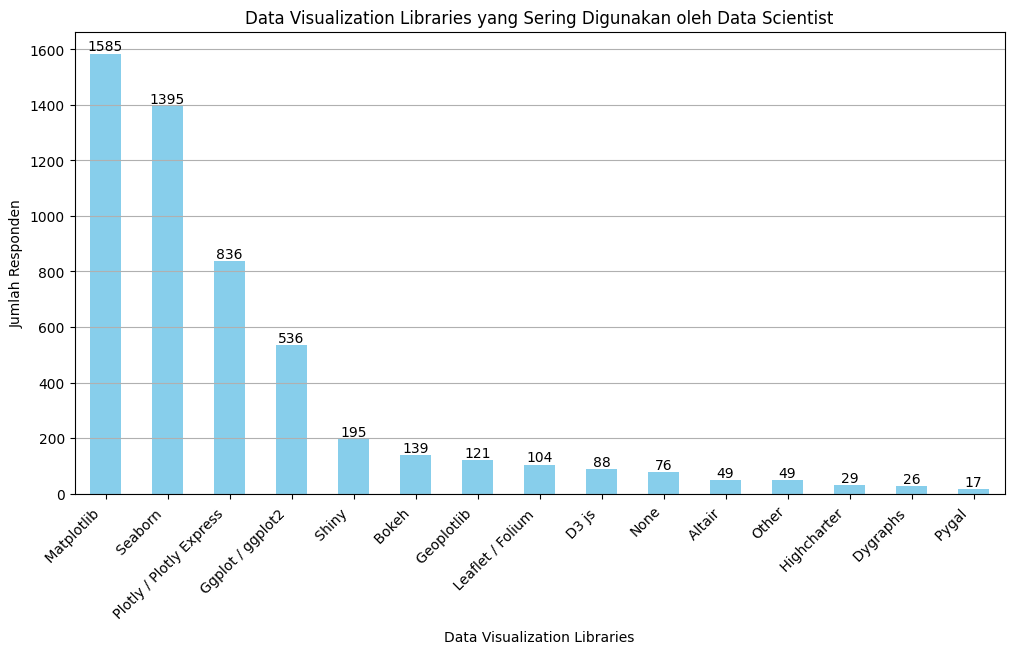

In [ ]:
# Data Scientist

# Gabungan  data visualization libraries Data Scientist
Q15_1 = df2_DS['Q15_1'].value_counts()
Q15_2 = df2_DS['Q15_2'].value_counts()
Q15_3 = df2_DS['Q15_3'].value_counts()
Q15_4 = df2_DS['Q15_4'].value_counts()
Q15_5 = df2_DS['Q15_5'].value_counts()
Q15_6 = df2_DS['Q15_6'].value_counts()
Q15_7 = df2_DS['Q15_7'].value_counts()
Q15_8 = df2_DS['Q15_8'].value_counts()
Q15_9 = df2_DS['Q15_9'].value_counts()
Q15_10 = df2_DS['Q15_10'].value_counts()
Q15_11 = df2_DS['Q15_11'].value_counts()
Q15_12 = df2_DS['Q15_12'].value_counts()
Q15_13 = df2_DS['Q15_13'].value_counts()
Q15_14 = df2_DS['Q15_14'].value_counts()
Q15_15 = df2_DS['Q15_15'].value_counts()

Q15_DS_Concat = pd.concat([Q15_1, Q15_2, Q15_3, Q15_4, Q15_5,
    Q15_6, Q15_7, Q15_8, Q15_9, Q15_10,
    Q15_11, Q15_12, Q15_13, Q15_14, Q15_15,
])

# Mengurutkan Q15_DS_Concat dari terbesar ke terkecil
Q15_DS_Concat_sorted = Q15_DS_Concat.sort_values(ascending=False)

# Membuat histogram dari Q15_DS_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q15_DS_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Data Visualization Libraries yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q15_DS_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Matplotlib**, **seaborn**, dan **plotly** merupakan  data visualization libraries yang sering di gunakan oleh Data Scientist

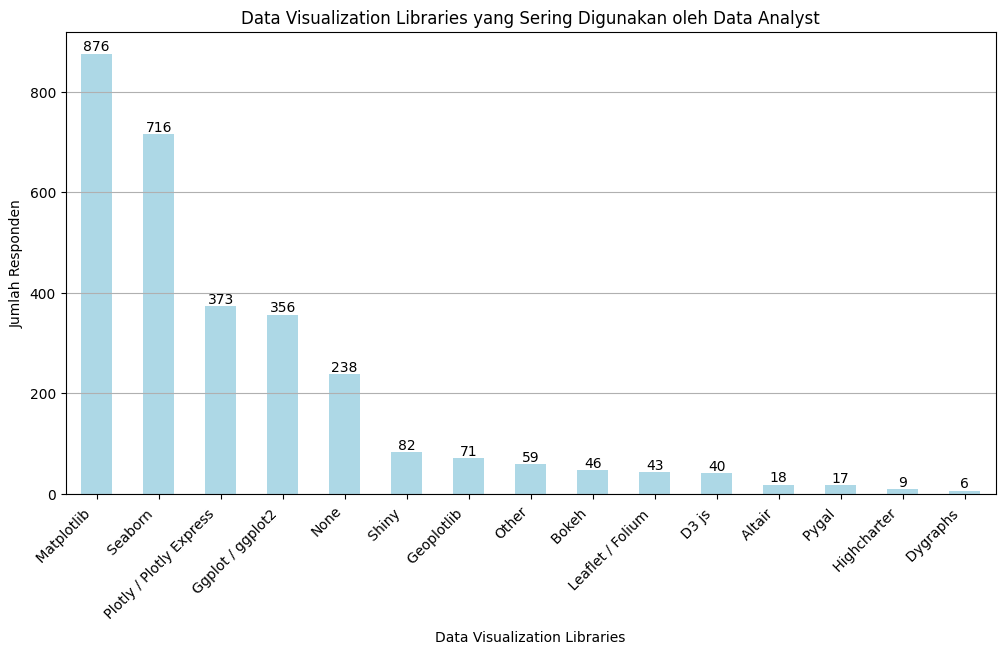

In [ ]:
# Data Analyst

# Gabungan  data visualization libraries Data Analyst
Q15_1_DA = df2_DA['Q15_1'].value_counts()
Q15_2_DA = df2_DA['Q15_2'].value_counts()
Q15_3_DA = df2_DA['Q15_3'].value_counts()
Q15_4_DA = df2_DA['Q15_4'].value_counts()
Q15_5_DA = df2_DA['Q15_5'].value_counts()
Q15_6_DA = df2_DA['Q15_6'].value_counts()
Q15_7_DA = df2_DA['Q15_7'].value_counts()
Q15_8_DA = df2_DA['Q15_8'].value_counts()
Q15_9_DA = df2_DA['Q15_9'].value_counts()
Q15_10_DA = df2_DA['Q15_10'].value_counts()
Q15_11_DA = df2_DA['Q15_11'].value_counts()
Q15_12_DA = df2_DA['Q15_12'].value_counts()
Q15_13_DA = df2_DA['Q15_13'].value_counts()
Q15_14_DA = df2_DA['Q15_14'].value_counts()
Q15_15_DA = df2_DA['Q15_15'].value_counts()

Q15_DA_Concat = pd.concat([Q15_1_DA, Q15_2_DA, Q15_3_DA, Q15_4_DA, Q15_5_DA,
    Q15_6_DA, Q15_7_DA, Q15_8_DA, Q15_9_DA, Q15_10_DA,
    Q15_11_DA, Q15_12_DA, Q15_13_DA, Q15_14_DA, Q15_15_DA,
])

# Mengurutkan Q15_DA_Concat dari terbesar ke terkecil
Q15_DA_Concat_sorted = Q15_DA_Concat.sort_values(ascending=False)

# Membuat histogram dari Q15_DA_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q15_DA_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Data Visualization Libraries yang Sering Digunakan oleh Data Analyst')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q15_DA_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Matplotlib**, **seaborn**, dan **plotly** merupakan  data visualization libraries yang sering di gunakan oleh Data Analyst

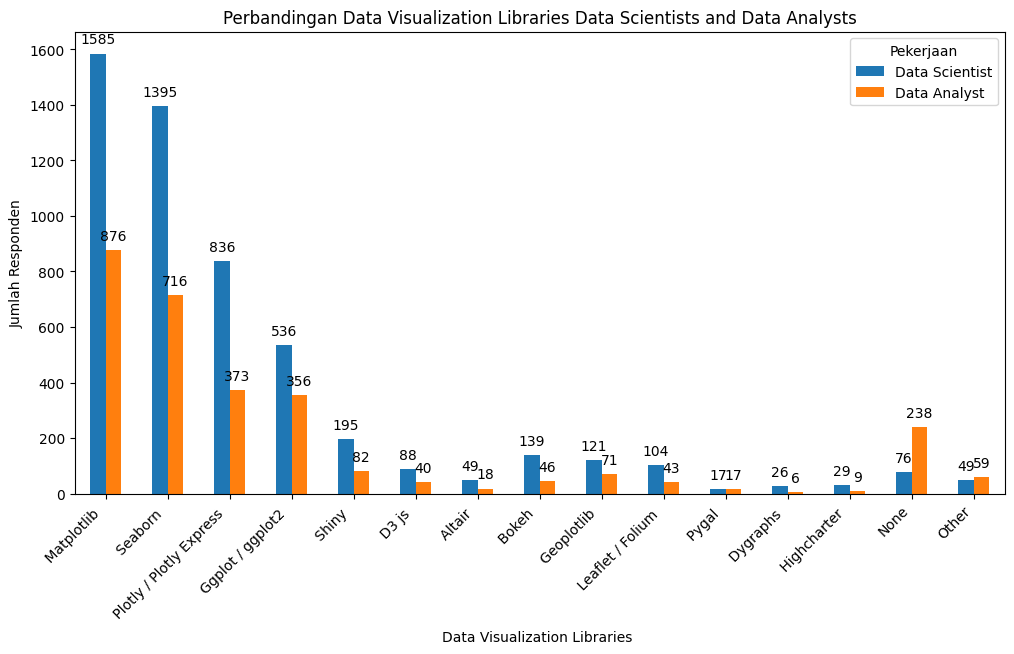

In [ ]:
# Create a DataFrame for Data Scientist and Data Analyst responses
df_ds = pd.DataFrame({'Data Scientist': Q15_DS_Concat, 'Data Analyst': Q15_DA_Concat})

# Grouped Bar
ax = df_ds.plot(kind='bar', rot=0, figsize=(12, 6))
ax.set_ylabel('Jumlah Responden')
ax.set_xlabel('Data Visualization Libraries ')
ax.set_title('Perbandingan Data Visualization Libraries Data Scientists and Data Analysts')

# Nilai Asli diatasnya
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Memiringkan label x sebesar 45 derajat
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(title='Pekerjaan')
plt.show()

**Interpretasi :**


*   Dari visualisasi grouped bar di atas, terlihat bahwa dalam penggunaan bahasa pemrograman baik data scientist maupun data analyst menggunakan **Matplotlib**, **Seaborn** dan **Plotly** sebagai Data Visualization Libraries yang sering di gunakan

## Machine Learning Framework

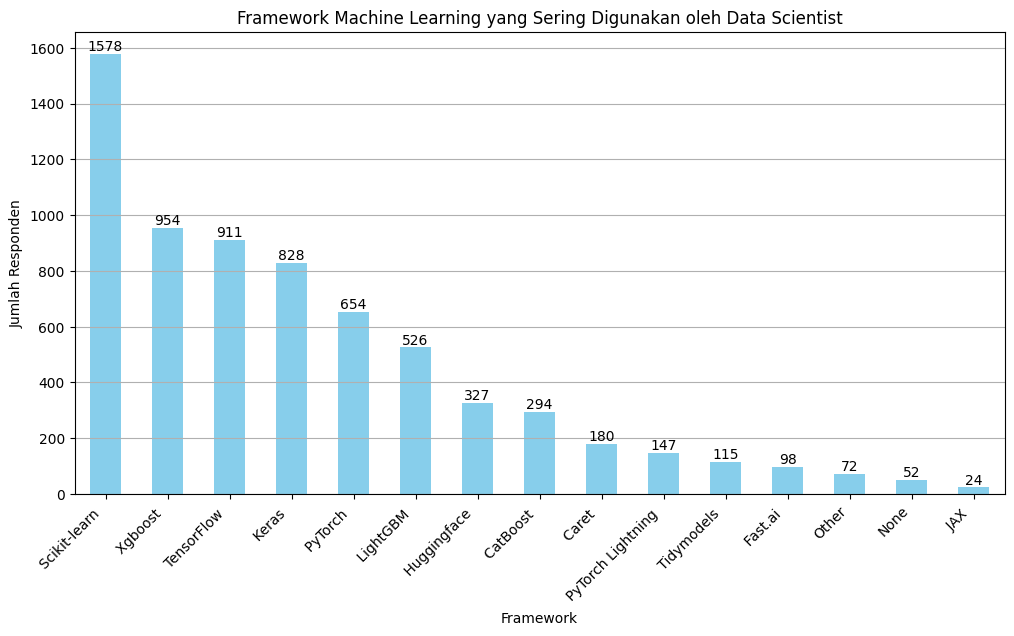

In [ ]:
# Data Scientist

# Framework ML Data Scientist
Q17_1 = df2_DS['Q17_1'].value_counts()
Q17_2 = df2_DS['Q17_2'].value_counts()
Q17_3 = df2_DS['Q17_3'].value_counts()
Q17_4 = df2_DS['Q17_4'].value_counts()
Q17_5 = df2_DS['Q17_5'].value_counts()
Q17_6 = df2_DS['Q17_6'].value_counts()
Q17_7 = df2_DS['Q17_7'].value_counts()
Q17_8 = df2_DS['Q17_8'].value_counts()
Q17_9 = df2_DS['Q17_9'].value_counts()
Q17_10 = df2_DS['Q17_10'].value_counts()
Q17_11 = df2_DS['Q17_11'].value_counts()
Q17_12 = df2_DS['Q17_12'].value_counts()
Q17_13 = df2_DS['Q17_13'].value_counts()
Q17_14 = df2_DS['Q17_14'].value_counts()
Q17_15 = df2_DS['Q17_15'].value_counts()

# Gabungan Framework ML
Q17_DS_Concat = pd.concat([Q17_1, Q17_2, Q17_3, Q17_4, Q17_5,
    Q17_6, Q17_7, Q17_8, Q17_9, Q17_10,
    Q17_11, Q17_12, Q17_13, Q17_14, Q17_15,
])

# Mengurutkan Q17_DS_Concat dari terbesar ke terkecil
Q17_DS_Concat_sorted = Q17_DS_Concat.sort_values(ascending=False)

# Membuat histogram dari Q17_DS_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q17_DS_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Framework Machine Learning yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Framework')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q17_DS_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

Dari visualisasi tersebut dapat kita ketahui bahwa **scikit-learn, Xgboost, TensorFlow, Keras, dan PyTorch** merupakan framework machine learning yang sering di gunakan oleh Data Scientist

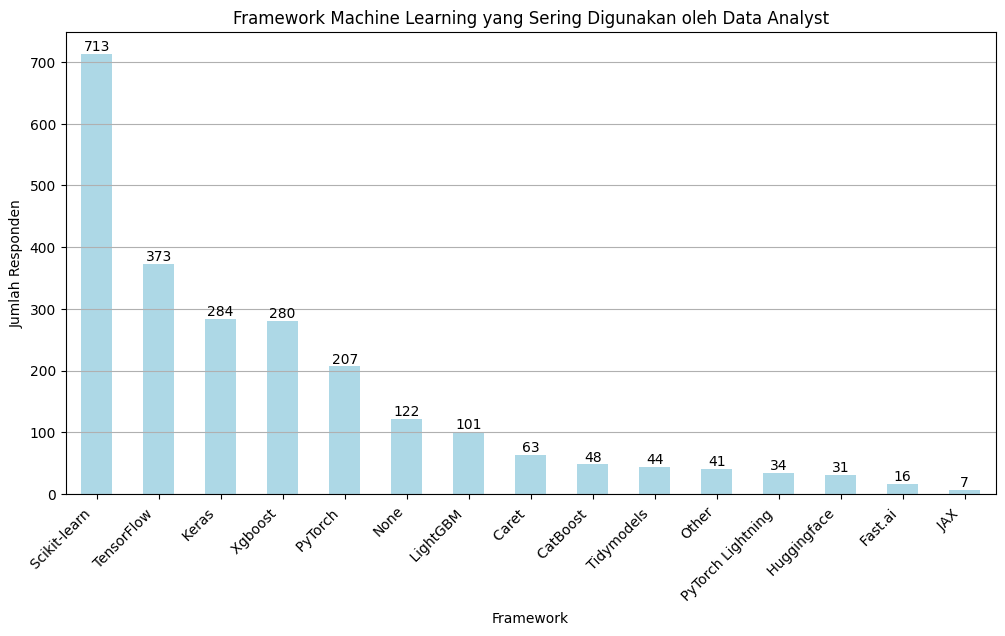

In [ ]:
# Data Analyst

# Framework ML Data Analyst
Q17_1_DA = df2_DA['Q17_1'].value_counts()
Q17_2_DA = df2_DA['Q17_2'].value_counts()
Q17_3_DA = df2_DA['Q17_3'].value_counts()
Q17_4_DA = df2_DA['Q17_4'].value_counts()
Q17_5_DA = df2_DA['Q17_5'].value_counts()
Q17_6_DA = df2_DA['Q17_6'].value_counts()
Q17_7_DA = df2_DA['Q17_7'].value_counts()
Q17_8_DA = df2_DA['Q17_8'].value_counts()
Q17_9_DA = df2_DA['Q17_9'].value_counts()
Q17_10_DA = df2_DA['Q17_10'].value_counts()
Q17_11_DA = df2_DA['Q17_11'].value_counts()
Q17_12_DA = df2_DA['Q17_12'].value_counts()
Q17_13_DA = df2_DA['Q17_13'].value_counts()
Q17_14_DA = df2_DA['Q17_14'].value_counts()
Q17_15_DA = df2_DA['Q17_15'].value_counts()

Q17_DA_Concat = pd.concat([Q17_1_DA, Q17_2_DA, Q17_3_DA, Q17_4_DA, Q17_5_DA,
    Q17_6_DA, Q17_7_DA, Q17_8_DA, Q17_9_DA, Q17_10_DA,
    Q17_11_DA, Q17_12_DA, Q17_13_DA, Q17_14_DA, Q17_15_DA,
])

# Mengurutkan Q17_DA_Concat dari terbesar ke terkecil
Q17_DA_Concat_sorted = Q17_DA_Concat.sort_values(ascending=False)

# Membuat histogram dari Q17_DA_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q17_DA_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Framework Machine Learning yang Sering Digunakan oleh Data Analyst')
plt.xlabel('Framework')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q17_DA_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
Dari visualisasi tersebut dapat kita ketahui bahwa **Scikit-learn, TensorFlow, Keras, Xgboost dan PyTorch** merupakan framework machine learning yang sering di gunakan oleh Data Analyst

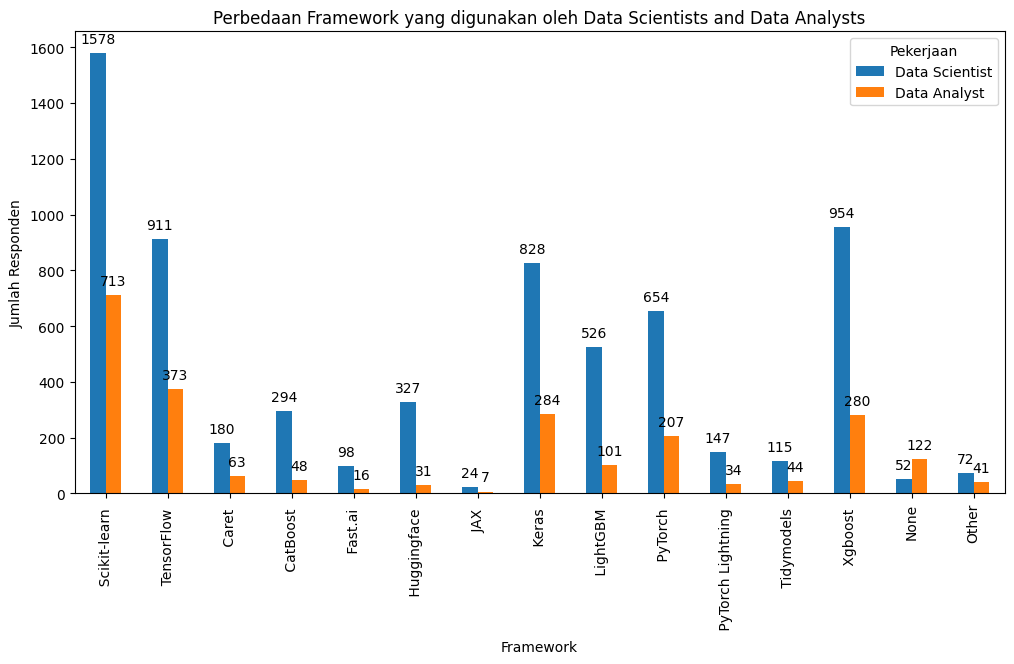

In [ ]:
# Create a DataFrame for Data Scientist and Data Analyst responses
df_ds = pd.DataFrame({'Data Scientist': Q17_DS_Concat, 'Data Analyst': Q17_DA_Concat})

# Sort the values
df_ds = df_ds.sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
df_ds.plot(kind='bar', ax=ax)

# Add actual values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
ax.set_ylabel('Jumlah Responden')
ax.set_xlabel('Framework')
ax.set_title('Perbedaan Framework yang digunakan oleh Data Scientists and Data Analysts')

plt.legend(title='Pekerjaan')
plt.show()

**Interpretasi :**
*   Dari visualisasi grouped bar di atas, terlihat bahwa terdapat perbedaan yang signifikan dalam menggunakan **framework machine learning** antara Data Scientist dan Data Analyst dimana jumlah responden Data Analyst cenderung lebih sedikit menggunakan framework machine learning



## Machine Learning Algorithms

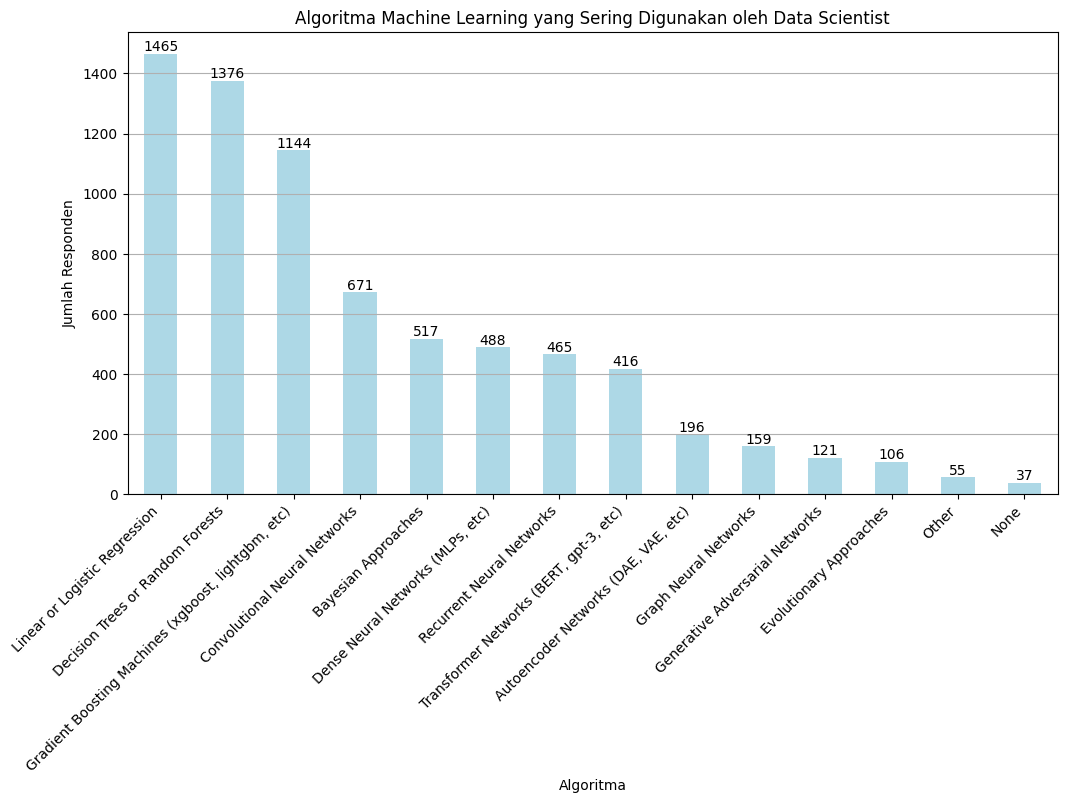

In [ ]:
# Data Scientist

# Algoritma ML Data Scientist
Q18_1 = df2_DS['Q18_1'].value_counts()
Q18_2 = df2_DS['Q18_2'].value_counts()
Q18_3 = df2_DS['Q18_3'].value_counts()
Q18_4 = df2_DS['Q18_4'].value_counts()
Q18_5 = df2_DS['Q18_5'].value_counts()
Q18_6 = df2_DS['Q18_6'].value_counts()
Q18_7 = df2_DS['Q18_7'].value_counts()
Q18_8 = df2_DS['Q18_8'].value_counts()
Q18_9 = df2_DS['Q18_9'].value_counts()
Q18_10 = df2_DS['Q18_10'].value_counts()
Q18_11 = df2_DS['Q18_11'].value_counts()
Q18_12 = df2_DS['Q18_12'].value_counts()
Q18_13 = df2_DS['Q18_13'].value_counts()
Q18_14 = df2_DS['Q18_14'].value_counts()

# Gabungan Algoritma ML Data Scientist
Q18_DS_Concat = pd.concat([Q18_1, Q18_2, Q18_3, Q18_4, Q18_5,
    Q18_6, Q18_7, Q18_8, Q18_9, Q18_10,
    Q18_11, Q18_12, Q18_13, Q18_14,
])

# Mengurutkan Q18_DS_Concat dari terbesar ke terkecil
Q18_DS_Concat_sorted = Q18_DS_Concat.sort_values(ascending=False)

# Membuat histogram dari Q18_DS_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q18_DS_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q18_DS_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()


**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Linear Regression, Decision Tree, dan Gradient Boosting Machines** merupakan algoritma machine learning yang sering di gunakan oleh Data Scientist

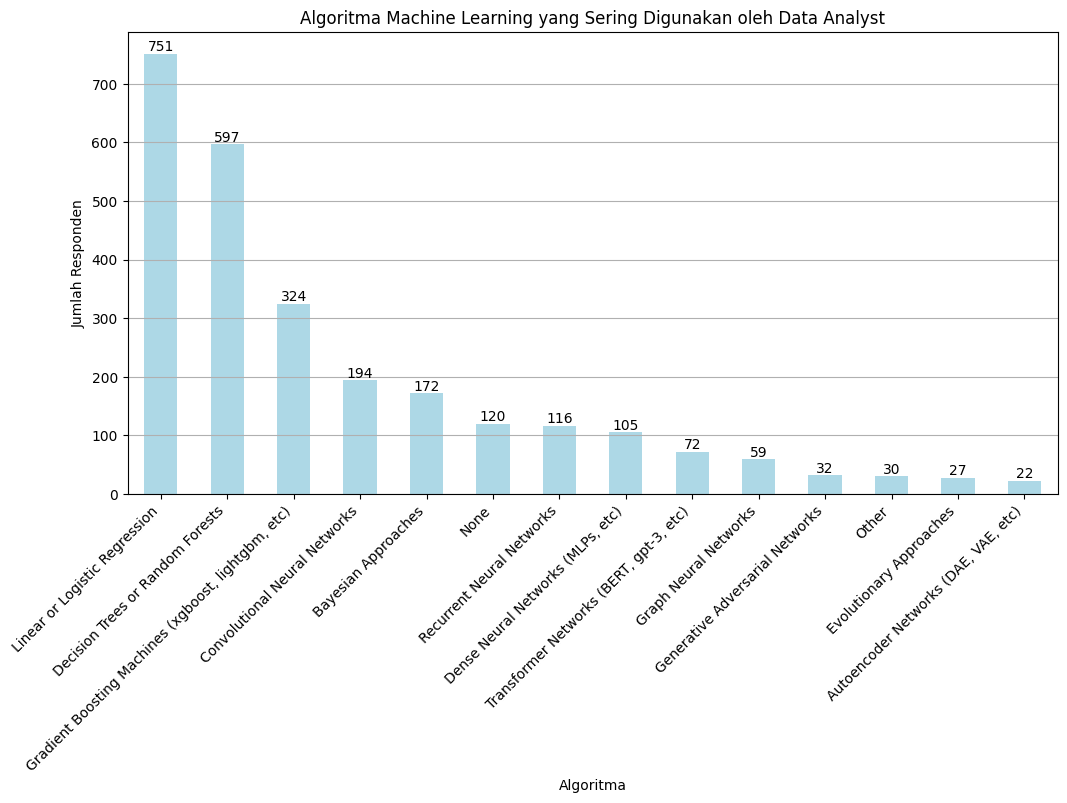

In [ ]:
# Data Analyst

# Algoritma ML Data Analyst
Q18_1_DA = df2_DA['Q18_1'].value_counts()
Q18_2_DA = df2_DA['Q18_2'].value_counts()
Q18_3_DA = df2_DA['Q18_3'].value_counts()
Q18_4_DA = df2_DA['Q18_4'].value_counts()
Q18_5_DA = df2_DA['Q18_5'].value_counts()
Q18_6_DA = df2_DA['Q18_6'].value_counts()
Q18_7_DA = df2_DA['Q18_7'].value_counts()
Q18_8_DA = df2_DA['Q18_8'].value_counts()
Q18_9_DA = df2_DA['Q18_9'].value_counts()
Q18_10_DA = df2_DA['Q18_10'].value_counts()
Q18_11_DA = df2_DA['Q18_11'].value_counts()
Q18_12_DA = df2_DA['Q18_12'].value_counts()
Q18_13_DA = df2_DA['Q18_13'].value_counts()
Q18_14_DA = df2_DA['Q18_14'].value_counts()

# Gabungan Algoritma ML Data Scientist
Q18_DA_Concat = pd.concat([Q18_1_DA,Q18_2_DA,Q18_3_DA,Q18_4_DA,Q18_5_DA,
    Q18_6_DA,Q18_7_DA,Q18_8_DA,Q18_9_DA,Q18_10_DA,
    Q18_11_DA,Q18_12_DA,Q18_13_DA,Q18_14_DA,
])

# Mengurutkan Q18_DA_Concat dari terbesar ke terkecil
Q18_DA_Concat_sorted = Q18_DA_Concat.sort_values(ascending=False)

# Membuat histogram dari Q18_DA_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q18_DA_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Analyst')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q18_DA_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**
* Dari visualisasi tersebut dapat kita ketahui bahwa **Linear Regression, Decision Tree, dan Gradient Boosting Machines** merupakan algoritma machine learning yang sering di gunakan oleh Data Analyst

<Figure size 1200x600 with 0 Axes>

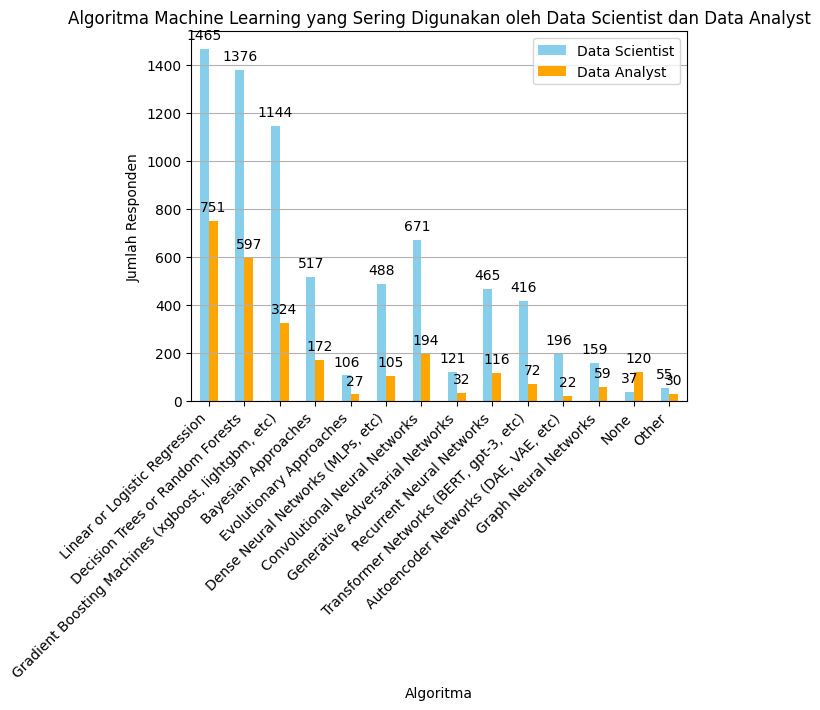

In [ ]:
# Gabungkan data dari Data Scientist dan Data Analyst
df_combined = pd.DataFrame({'Data Scientist': Q18_DS_Concat, 'Data Analyst': Q18_DA_Concat})

# Membuat grouped bar chart
plt.figure(figsize=(12, 6))
ax = df_combined.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Scientist dan Data Analyst')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')  # Agar label x lebih mudah dibaca
plt.legend()
plt.grid(axis='y')

# Menambahkan nilai pada batang visualisasi
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan plot
plt.show()

**Interpretasi :**
*   Dari visualisasi grouped bar di atas, terlihat bahwa terdapat perbedaan **penggunaan algortima machine learning** antara Data Scientist dan Data Analyst dimana jumlah responden Data Analyst cenderung lebih sedikit menggunakan algortima machine learning



## Data Products (relational databases, data warehouses, data lakes, or similar)

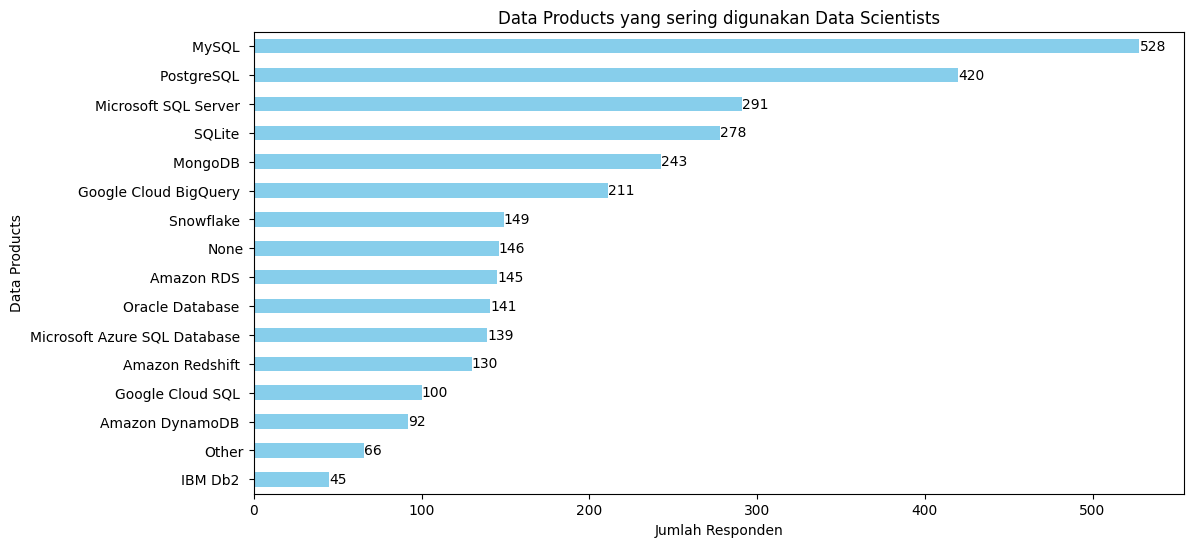

In [ ]:
#Data Analyst

# Data Products Data Scientist
Q35_1 = df2_DS['Q35_1'].value_counts()
Q35_2 = df2_DS['Q35_2'].value_counts()
Q35_3 = df2_DS['Q35_3'].value_counts()
Q35_4 = df2_DS['Q35_4'].value_counts()
Q35_5 = df2_DS['Q35_5'].value_counts()
Q35_6 = df2_DS['Q35_6'].value_counts()
Q35_7 = df2_DS['Q35_7'].value_counts()
Q35_8 = df2_DS['Q35_8'].value_counts()
Q35_9 = df2_DS['Q35_9'].value_counts()
Q35_10 = df2_DS['Q35_10'].value_counts()
Q35_11 = df2_DS['Q35_11'].value_counts()
Q35_12 = df2_DS['Q35_12'].value_counts()
Q35_13 = df2_DS['Q35_13'].value_counts()
Q35_14 = df2_DS['Q35_14'].value_counts()
Q35_15 = df2_DS['Q35_15'].value_counts()
Q35_16 = df2_DS['Q35_16'].value_counts()

# Gabungan Data Products Data Scientist
Q35_DS_Concat = pd.concat([Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,
    Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,
    Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,
    Q35_16
])

# Mengurutkan Q35_DS_Concat dari terbesar ke terkecil
Q35_DS_Concat_sorted = Q35_DS_Concat.sort_values(ascending=True)

# Membuat histogram dari Q35_DS_Concat yang sudah diurutkan (horizontal bar)
plt.figure(figsize=(12, 6))
Q35_DS_Concat_sorted.plot(kind='barh', color='skyblue')  # Menggunakan kind='barh' untuk horizontal bar
plt.title('Data Products yang sering digunakan Data Scientists')
plt.xlabel('Jumlah Responden')
plt.ylabel('Data Products')

# Menambahkan nilai masing-masing batang
for index, value in enumerate(Q35_DS_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Mengatur label y
plt.yticks(rotation=0, ha='right')  # Rotasi label y sebesar 0 derajat dan rata kanan

# Menampilkan plot
plt.show()

**Interpretasi :**

Dari visualisasi tersebut dapat kita ketahui bahwa **MySQL dan PostgreSQL** merupakan data products yang sering di gunakan oleh Data Scientist

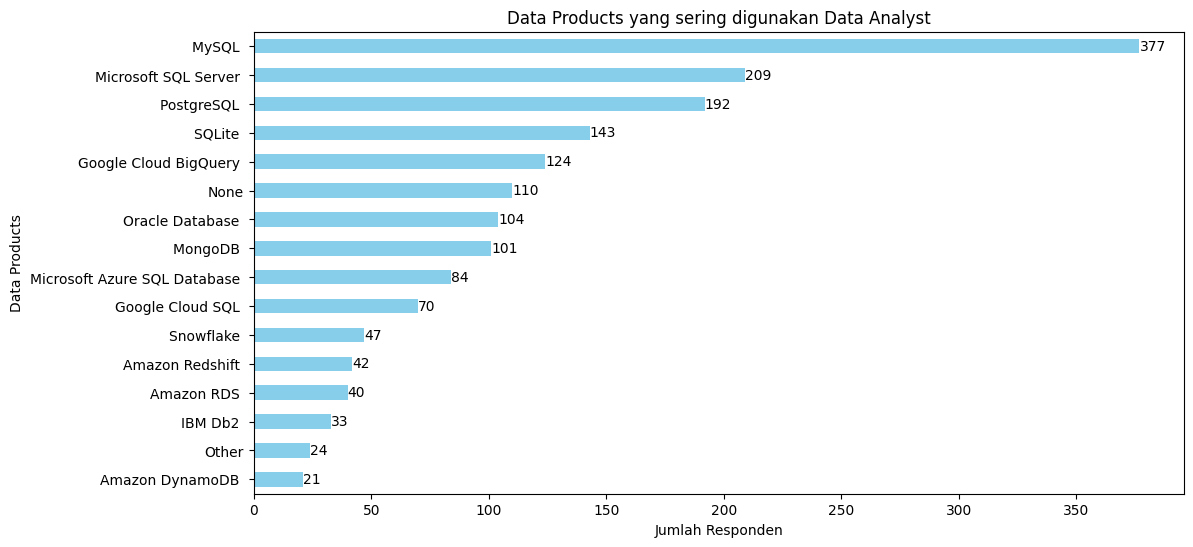

In [ ]:
# Data Analyst

# Data Products Data Analyst
Q35_1_DA = df2_DA['Q35_1'].value_counts()
Q35_2_DA = df2_DA['Q35_2'].value_counts()
Q35_3_DA = df2_DA['Q35_3'].value_counts()
Q35_4_DA = df2_DA['Q35_4'].value_counts()
Q35_5_DA = df2_DA['Q35_5'].value_counts()
Q35_6_DA = df2_DA['Q35_6'].value_counts()
Q35_7_DA = df2_DA['Q35_7'].value_counts()
Q35_8_DA = df2_DA['Q35_8'].value_counts()
Q35_9_DA = df2_DA['Q35_9'].value_counts()
Q35_10_DA = df2_DA['Q35_10'].value_counts()
Q35_11_DA = df2_DA['Q35_11'].value_counts()
Q35_12_DA = df2_DA['Q35_12'].value_counts()
Q35_13_DA = df2_DA['Q35_13'].value_counts()
Q35_14_DA = df2_DA['Q35_14'].value_counts()
Q35_15_DA = df2_DA['Q35_15'].value_counts()
Q35_16_DA = df2_DA['Q35_16'].value_counts()

Q35_DA_Concat = pd.concat([Q35_1_DA,Q35_2_DA,Q35_3_DA,Q35_4_DA,Q35_5_DA,
    Q35_6_DA,Q35_7_DA,Q35_8_DA,Q35_9_DA,Q35_10_DA,
    Q35_11_DA,Q35_12_DA,Q35_13_DA,Q35_14_DA,Q35_15_DA,
    Q35_16_DA,
])

# Mengurutkan Q35_DA_Concat dari terbesar ke terkecil
Q35_DA_Concat_sorted = Q35_DA_Concat.sort_values(ascending=True)

# Membuat histogram dari Q35_DA_Concat yang sudah diurutkan (horizontal bar)
plt.figure(figsize=(12, 6))
Q35_DA_Concat_sorted.plot(kind='barh', color='skyblue')  # Menggunakan kind='barh' untuk horizontal bar
plt.title('Data Products yang sering digunakan Data Analyst')
plt.xlabel('Jumlah Responden')
plt.ylabel('Data Products')

# Menambahkan nilai masing-masing batang
for index, value in enumerate(Q35_DA_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Mengatur label y
plt.yticks(rotation=0, ha='right')  # Rotasi label y sebesar 0 derajat dan rata kanan

# Menampilkan plot
plt.show()

**Interpretasi :**

Dari visualisasi tersebut dapat kita ketahui bahwa **MySQL dan Microsoft SQL Server** merupakan data products yang sering di gunakan oleh Data Analyst

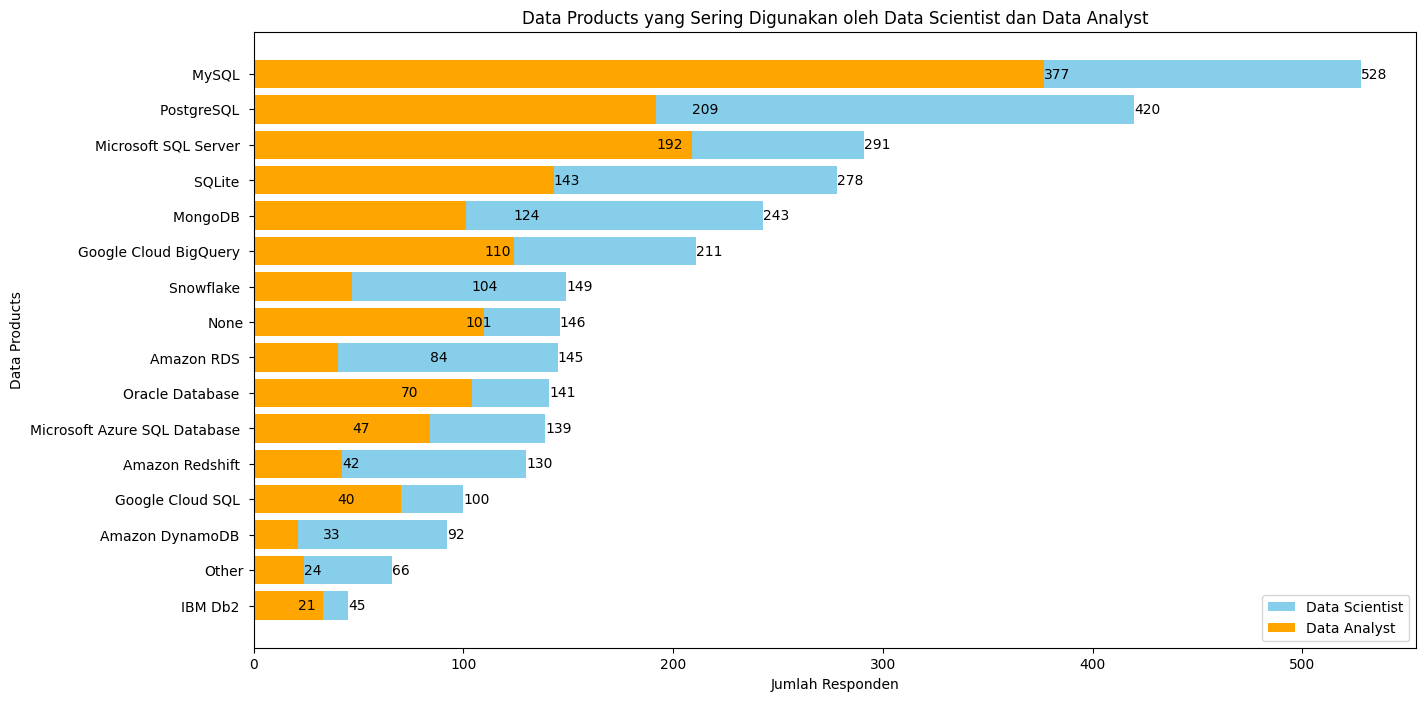

In [ ]:
# Membuat grouped bar chart dari Data Products Data Scientist dan Data Analyst

# Ukuran plot
plt.figure(figsize=(15, 8))

# Plot bar chart untuk Data Scientist
plt.barh(Q35_DS_Concat_sorted.index, Q35_DS_Concat_sorted, color='skyblue', label='Data Scientist')

# Menambahkan nilai masing-masing batang Data Scientist
for index, value in enumerate(Q35_DS_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Plot bar chart untuk Data Analyst
plt.barh(Q35_DA_Concat_sorted.index, Q35_DA_Concat_sorted, color='orange', label='Data Analyst')

# Menambahkan nilai masing-masing batang Data Analyst
for index, value in enumerate(Q35_DA_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Menambahkan label dan judul
plt.xlabel('Jumlah Responden')
plt.ylabel('Data Products')
plt.title('Data Products yang Sering Digunakan oleh Data Scientist dan Data Analyst')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

## Business Intelligence Tools

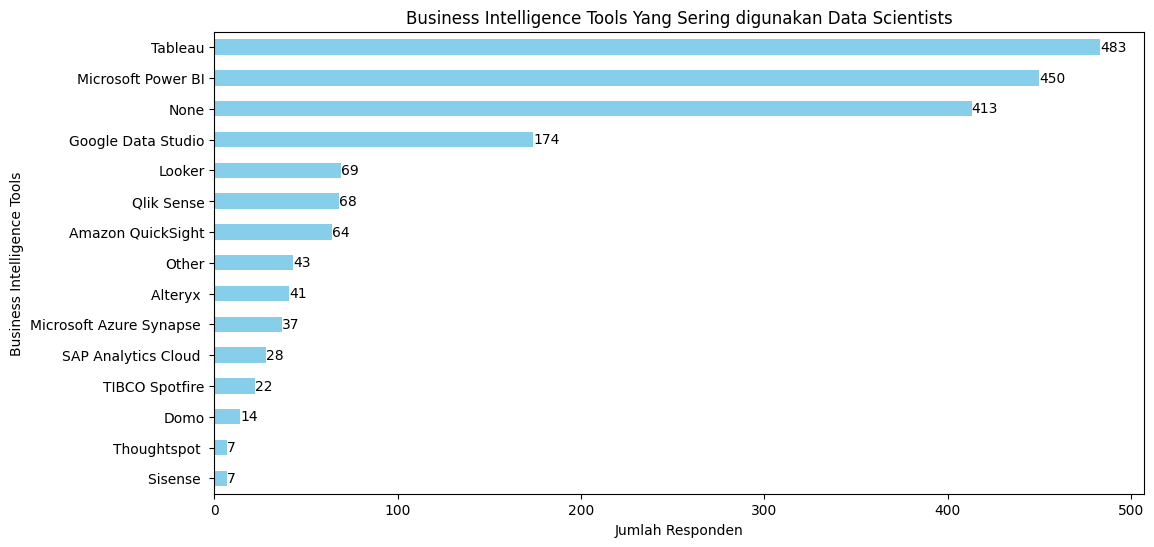

In [ ]:
# Data Scientist

# Alat business intelligence Data Scientist
Q36_1 = df2_DS['Q36_1'].value_counts()
Q36_2 = df2_DS['Q36_2'].value_counts()
Q36_3 = df2_DS['Q36_3'].value_counts()
Q36_4 = df2_DS['Q36_4'].value_counts()
Q36_5 = df2_DS['Q36_5'].value_counts()
Q36_6 = df2_DS['Q36_6'].value_counts()
Q36_7 = df2_DS['Q36_7'].value_counts()
Q36_8 = df2_DS['Q36_8'].value_counts()
Q36_9 = df2_DS['Q36_9'].value_counts()
Q36_10 = df2_DS['Q36_10'].value_counts()
Q36_11 = df2_DS['Q36_11'].value_counts()
Q36_12 = df2_DS['Q36_12'].value_counts()
Q36_13 = df2_DS['Q36_13'].value_counts()
Q36_14 = df2_DS['Q36_14'].value_counts()
Q36_15 = df2_DS['Q36_15'].value_counts()

# Gabungan Alat business intelligence Data Scientist
Q36_DS_Concat = pd.concat([Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,
    Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,
    Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,
])

# Mengurutkan Q36_DS_Concat dari terbesar ke terkecil
Q36_DS_Concat_sorted = Q36_DS_Concat.sort_values(ascending=True)

# Membuat histogram dari Q36_DS_Concat yang sudah diurutkan (horizontal bar)
plt.figure(figsize=(12, 6))
Q36_DS_Concat_sorted.plot(kind='barh', color='skyblue')  # Menggunakan kind='barh' untuk horizontal bar
plt.title('Business Intelligence Tools Yang Sering digunakan Data Scientists')
plt.xlabel('Jumlah Responden')
plt.ylabel('Business Intelligence Tools')

# Menambahkan nilai masing-masing batang
for index, value in enumerate(Q36_DS_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Mengatur label y
plt.yticks(rotation=0, ha='right')  # Rotasi label y sebesar 0 derajat dan rata kanan

# Menampilkan plot
plt.show()

**Interpretasi :**

Dari visualisasi tersebut dapat kita ketahui bahwa **Tableau dan Microsoft Power BI** merupakan Business Intelligence Tools Yang Sering digunakan Data Scientists

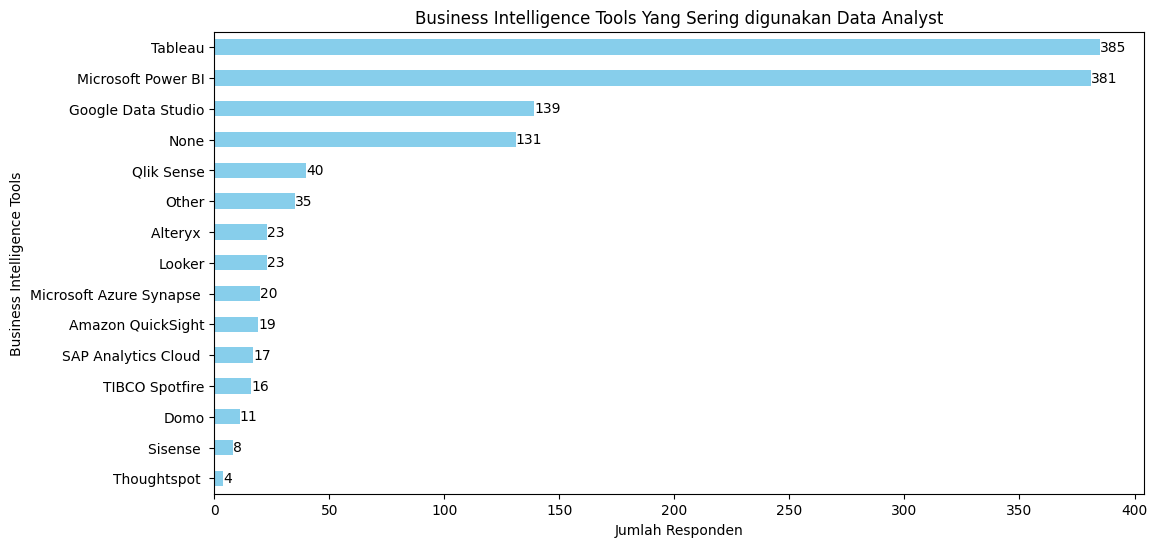

In [ ]:
# Data Analyst

# Alat business intelligence Data Analyst
Q36_1_DA = df2_DA['Q36_1'].value_counts()
Q36_2_DA = df2_DA['Q36_2'].value_counts()
Q36_3_DA = df2_DA['Q36_3'].value_counts()
Q36_4_DA = df2_DA['Q36_4'].value_counts()
Q36_5_DA = df2_DA['Q36_5'].value_counts()
Q36_6_DA = df2_DA['Q36_6'].value_counts()
Q36_7_DA = df2_DA['Q36_7'].value_counts()
Q36_8_DA = df2_DA['Q36_8'].value_counts()
Q36_9_DA = df2_DA['Q36_9'].value_counts()
Q36_10_DA = df2_DA['Q36_10'].value_counts()
Q36_11_DA = df2_DA['Q36_11'].value_counts()
Q36_12_DA = df2_DA['Q36_12'].value_counts()
Q36_13_DA = df2_DA['Q36_13'].value_counts()
Q36_14_DA = df2_DA['Q36_14'].value_counts()
Q36_15_DA = df2_DA['Q36_15'].value_counts()

# Gabungan Alat business intelligence Data Analyst
Q36_DA_Concat = pd.concat([Q36_1_DA,Q36_2_DA,Q36_3_DA,Q36_4_DA,Q36_5_DA,
    Q36_6_DA,Q36_7_DA,Q36_8_DA,Q36_9_DA,Q36_10_DA,
    Q36_11_DA,Q36_12_DA,Q36_13_DA,Q36_14_DA,Q36_15_DA,
])

# Mengurutkan Q36_DA_Concat dari terbesar ke terkecil
Q36_DA_Concat_sorted = Q36_DA_Concat.sort_values(ascending=True)

# Membuat histogram dari Q36_DA_Concat yang sudah diurutkan (horizontal bar)
plt.figure(figsize=(12, 6))
Q36_DA_Concat_sorted.plot(kind='barh', color='skyblue')  # Menggunakan kind='barh' untuk horizontal bar
plt.title('Business Intelligence Tools Yang Sering digunakan Data Analyst')
plt.xlabel('Jumlah Responden')
plt.ylabel('Business Intelligence Tools')

# Menambahkan nilai masing-masing batang
for index, value in enumerate(Q36_DA_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Mengatur label y
plt.yticks(rotation=0, ha='right')  # Rotasi label y sebesar 0 derajat dan rata kanan

# Menampilkan plot
plt.show()

**Interpretasi :**

Dari visualisasi tersebut dapat kita ketahui bahwa **Tableau dan Microsoft Power BI** merupakan Business Intelligence Tools Yang Sering digunakan Data Analyst

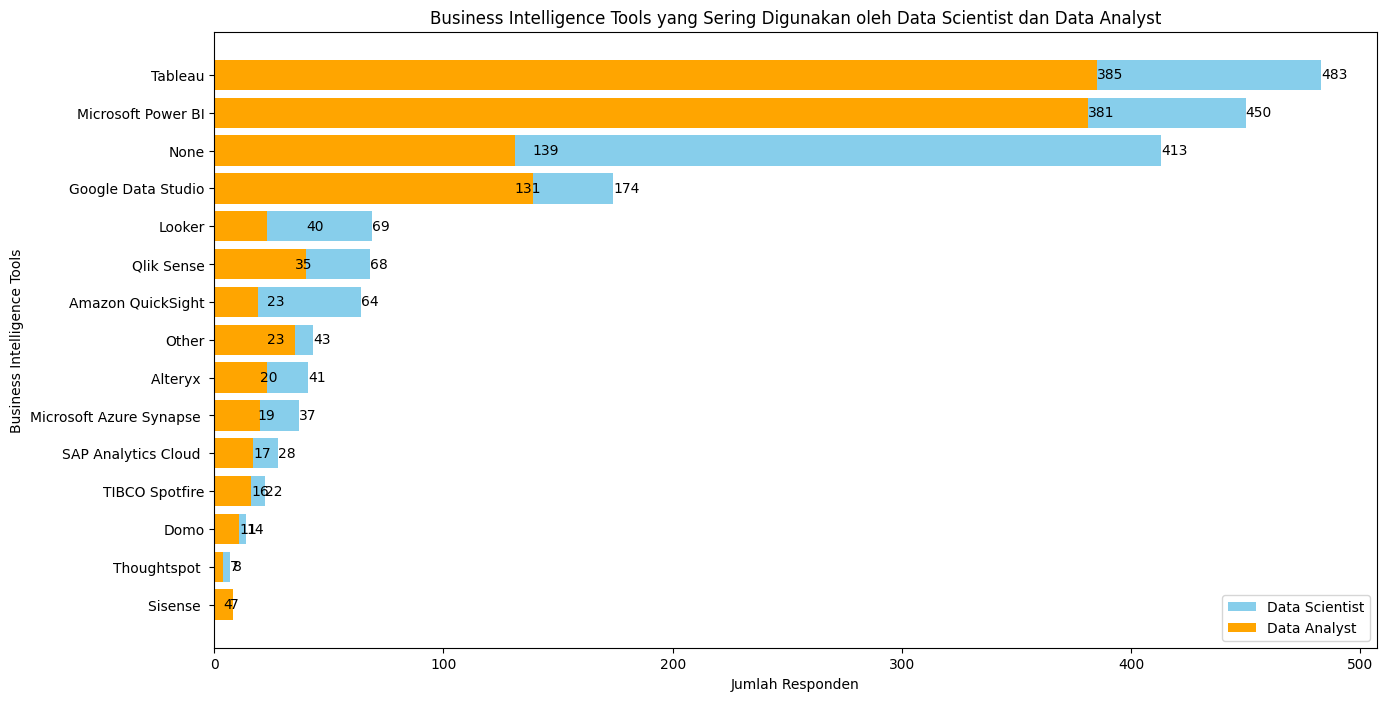

In [ ]:
# Membuat grouped bar chart dari Business Intelligence Tools Data Scientist dan Data Analyst

# Ukuran plot
plt.figure(figsize=(15, 8))

# Plot bar chart untuk Data Scientist
plt.barh(Q36_DS_Concat_sorted.index, Q36_DS_Concat_sorted, color='skyblue', label='Data Scientist')

# Menambahkan nilai masing-masing batang Data Scientist
for index, value in enumerate(Q36_DS_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Plot bar chart untuk Data Analyst
plt.barh(Q36_DA_Concat_sorted.index, Q36_DA_Concat_sorted, color='orange', label='Data Analyst')

# Menambahkan nilai masing-masing batang Data Analyst
for index, value in enumerate(Q36_DA_Concat_sorted):
    plt.text(value, index, str(value), ha='left', va='center')

# Menambahkan label dan judul
plt.xlabel('Jumlah Responden')
plt.ylabel('Business Intelligence Tools')
plt.title('Business Intelligence Tools yang Sering Digunakan oleh Data Scientist dan Data Analyst')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.show()

**Interpretasi:**

# **Clustering**

## Filtering Data

In [ ]:
# Data berdasarkan Data Scientist
df_filter = data[data['Q23'].isin(['Data Scientist'])]

In [ ]:
column_names_list = list(data.columns)
print("Column names as a list:", column_names_list)

Column names as a list: ['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2', 'Q10_3', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q

## Skill Set Data Scientist Berdasarkan Pengamalan Dalam Menggunakan Metode Machine Learning

In [ ]:
# Melakukan one hot encoding terhadap data multiple choice
df_encoded = df_filter[['Q12_1', 'Q12_3', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15',
                      'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15',
                      'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15',
                      'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14',
                      'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6', 'Q31_7', 'Q31_8', 'Q31_9', 'Q31_10', 'Q31_11', 'Q31_12',
                      'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8', 'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16',
                      'Q36_1', 'Q36_2', 'Q36_3', 'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10', 'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15']]

df_encoded = pd.get_dummies(df_encoded)

# Mengubah kategorik menjadi numerik
df_label = df_filter[['Q11', 'Q16']]

# Mapping kategori Pengalaman Coding
coding_mapping = {
    'I have never written code': 1,
    '< 1 years': 2,
    '1-2 years': 3,
    '3-5 years': 4,
    '5-10 years': 5,
    '10-20 years': 6,
    '20+ years': 7,
}

# Mapping kategori Pengalaman ML
ML_mapping = {
    'I do not use machine learning methods': 1,
    'Under 1 year': 2,
    '1-2 years': 3,
    '2-3 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8
}

df_label['Q11'] = df_label['Q11'].map(coding_mapping)
df_label['Q16'] = df_label['Q16'].map(ML_mapping)

# Menggabungkan dua DataFrames
df_cluster = pd.concat([df_encoded, df_label], axis =1 )

# Mengisi nilai NaN pada kolom 'Q11' dengan median
df_cluster['Q11'].fillna(df_cluster['Q11'].median(), inplace=True)

# Mengisi nilai NaN pada kolom 'Q16' dengan median
df_cluster['Q16'].fillna(df_cluster['Q16'].median(), inplace=True)

<ipython-input-96-ff04be9e91ff>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Q11'] = df_label['Q11'].map(coding_mapping)
<ipython-input-96-ff04be9e91ff>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['Q16'] = df_label['Q16'].map(ML_mapping)


In [ ]:
df_cluster.isnull().sum()

Q12_1_Python           0
Q12_3_SQL              0
Q12_7_Java             0
Q12_8_Javascript       0
Q12_9_Bash             0
                      ..
Q36_13_Thoughtspot     0
Q36_14_None            0
Q36_15_Other           0
Q11                    0
Q16                    0
Length: 100, dtype: int64

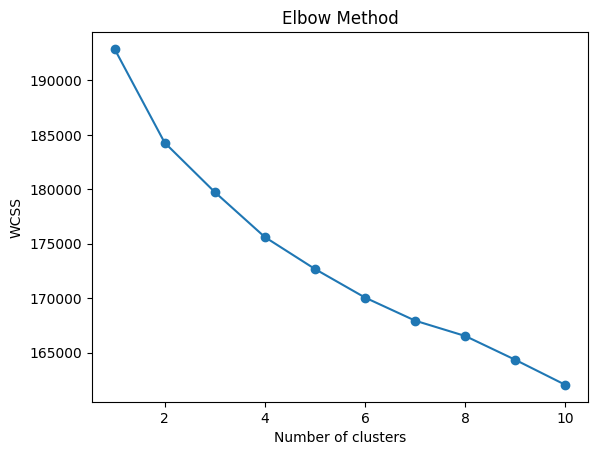

In [ ]:
# Melakukan scaling data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)  # Use df_cluster here

# Menggunakan Elbow Method untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

Pada gambar elbow method tersebut, yang terlihat paling optimal adalah k = 3, sehingga akan di pilih k = 3

In [ ]:
# Melakukan k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)  # Use df_cluster here
df_filter['Cluster'] = kmeans.fit_predict(df_scaled)  # Use df_cluster here

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-99-94787d26f437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Cluster'] = kmeans.fit_predict(df_scaled)  # Use df_cluster here


In [ ]:
# Akan dipisahkan clusteringnya lalu akan ditentukan label dari setiap cluster, keputusan labeling berdasarkan lama coding Q11
df0 = df_cluster[df_cluster['Cluster'] == 0]
df1 = df_cluster[df_cluster['Cluster'] == 1]
df2 = df_cluster[df_cluster['Cluster'] == 2]

In [ ]:
# Akan dipisahkan clusteringnya lalu akan ditentukan label dari setiap cluster, keputusan labeling berdasarkan lama coding Q11
df00 = df_filter[df_filter['Cluster'] == 0]
df11 = df_filter[df_filter['Cluster'] == 1]
df22 = df_filter[df_filter['Cluster'] == 2]

In [ ]:
df0[['Q16','Cluster']].describe()

,Q16,Cluster
count,318.000000,318.0
mean,3.374214,0.0
std,1.781847,0.0
min,1.000000,0.0
25%,2.000000,0.0
50%,3.000000,0.0
75%,4.000000,0.0
max,7.000000,0.0


In [ ]:
df1[['Q16','Cluster']].describe()

,Q16,Cluster
count,1173.000000,1173.0
mean,4.147485,1.0
std,1.420680,0.0
min,2.000000,1.0
25%,3.000000,1.0
50%,4.000000,1.0
75%,5.000000,1.0
max,7.000000,1.0


In [ ]:
df2[['Q16','Cluster']].describe()

,Q16,Cluster
count,438.000000,438.0
mean,4.694064,2.0
std,1.357246,0.0
min,2.000000,2.0
25%,4.000000,2.0
50%,5.000000,2.0
75%,6.000000,2.0
max,7.000000,2.0


*   df00 = cluster 0 adalah data scientist junior level
*   df11 = cluster 1 adalah data scientist intermediate level
*   df22 = cluster 2 adalah data scientist senior level



## Programming Languages

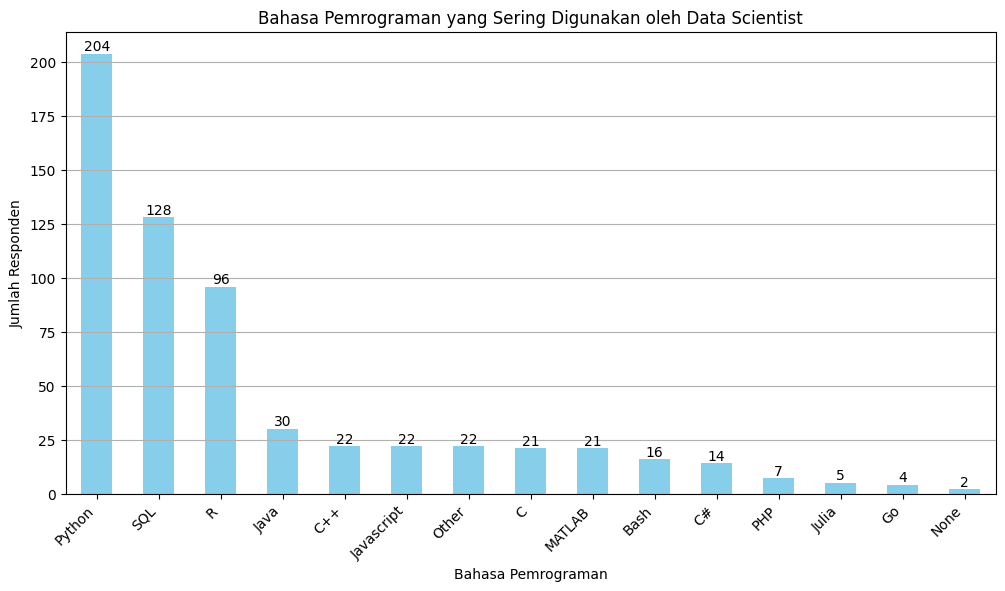

In [ ]:
# Cluster (0)

df2_DS0 = df00[df00['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q12_1 = df2_DS0['Q12_1'].value_counts()
Q12_2 = df2_DS0['Q12_2'].value_counts()
Q12_3 = df2_DS0['Q12_3'].value_counts()
Q12_4 = df2_DS0['Q12_4'].value_counts()
Q12_5 = df2_DS0['Q12_5'].value_counts()
Q12_6 = df2_DS0['Q12_6'].value_counts()
Q12_7 = df2_DS0['Q12_7'].value_counts()
Q12_8 = df2_DS0['Q12_8'].value_counts()
Q12_9 = df2_DS0['Q12_9'].value_counts()
Q12_10 = df2_DS0['Q12_10'].value_counts()
Q12_11 = df2_DS0['Q12_11'].value_counts()
Q12_12 = df2_DS0['Q12_12'].value_counts()
Q12_13 = df2_DS0['Q12_13'].value_counts()
Q12_14 = df2_DS0['Q12_14'].value_counts()
Q12_15 = df2_DS0['Q12_15'].value_counts()

Q12_DS0_Concat = pd.concat([Q12_1, Q12_2, Q12_3, Q12_4, Q12_5,
    Q12_6, Q12_7, Q12_8, Q12_9, Q12_10,
    Q12_11, Q12_12, Q12_13, Q12_14, Q12_15,
])

# Mengurutkan Q12_DS0_Concat dari terbesar ke terkecil
Q12_DS0_Concat_sorted = Q12_DS0_Concat.sort_values(ascending=False)

# Membuat histogram dari Q12_DS0_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q12_DS0_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Bahasa Pemrograman yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Bahasa Pemrograman')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q12_DS0_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

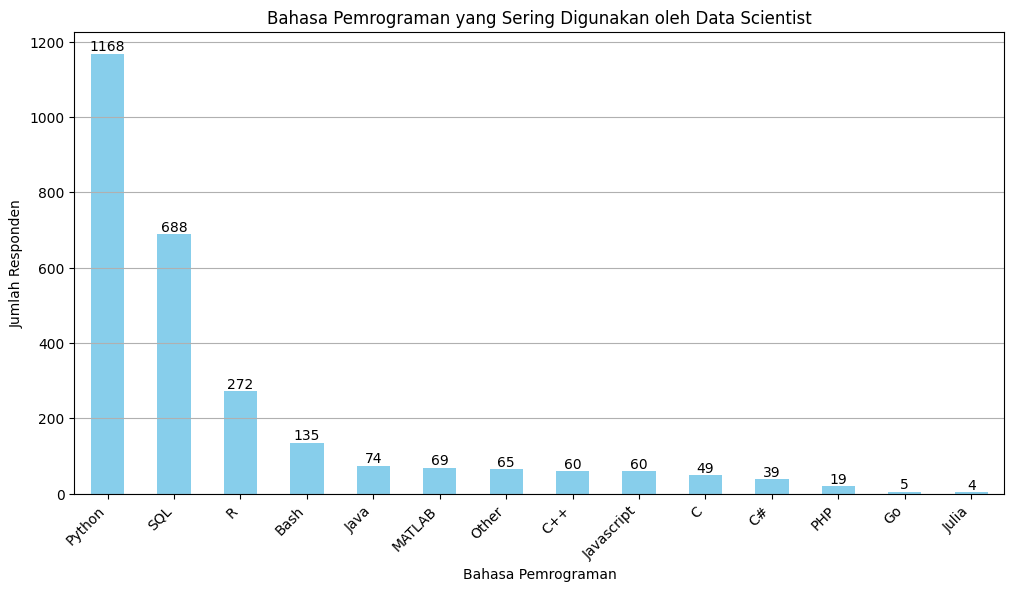

In [ ]:
# Cluster (1)

df2_DS1 = df11[df11['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q12_1 = df2_DS1['Q12_1'].value_counts()
Q12_2 = df2_DS1['Q12_2'].value_counts()
Q12_3 = df2_DS1['Q12_3'].value_counts()
Q12_4 = df2_DS1['Q12_4'].value_counts()
Q12_5 = df2_DS1['Q12_5'].value_counts()
Q12_6 = df2_DS1['Q12_6'].value_counts()
Q12_7 = df2_DS1['Q12_7'].value_counts()
Q12_8 = df2_DS1['Q12_8'].value_counts()
Q12_9 = df2_DS1['Q12_9'].value_counts()
Q12_10 = df2_DS1['Q12_10'].value_counts()
Q12_11 = df2_DS1['Q12_11'].value_counts()
Q12_12 = df2_DS1['Q12_12'].value_counts()
Q12_13 = df2_DS1['Q12_13'].value_counts()
Q12_14 = df2_DS1['Q12_14'].value_counts()
Q12_15 = df2_DS1['Q12_15'].value_counts()

Q12_DS1_Concat = pd.concat([Q12_1, Q12_2, Q12_3, Q12_4, Q12_5,
    Q12_6, Q12_7, Q12_8, Q12_9, Q12_10,
    Q12_11, Q12_12, Q12_13, Q12_14, Q12_15,
])

# Mengurutkan Q12_DS1_Concat dari terbesar ke terkecil
Q12_DS1_Concat_sorted = Q12_DS1_Concat.sort_values(ascending=False)

# Membuat histogram dari Q12_DS1_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q12_DS1_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Bahasa Pemrograman yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Bahasa Pemrograman')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q12_DS1_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

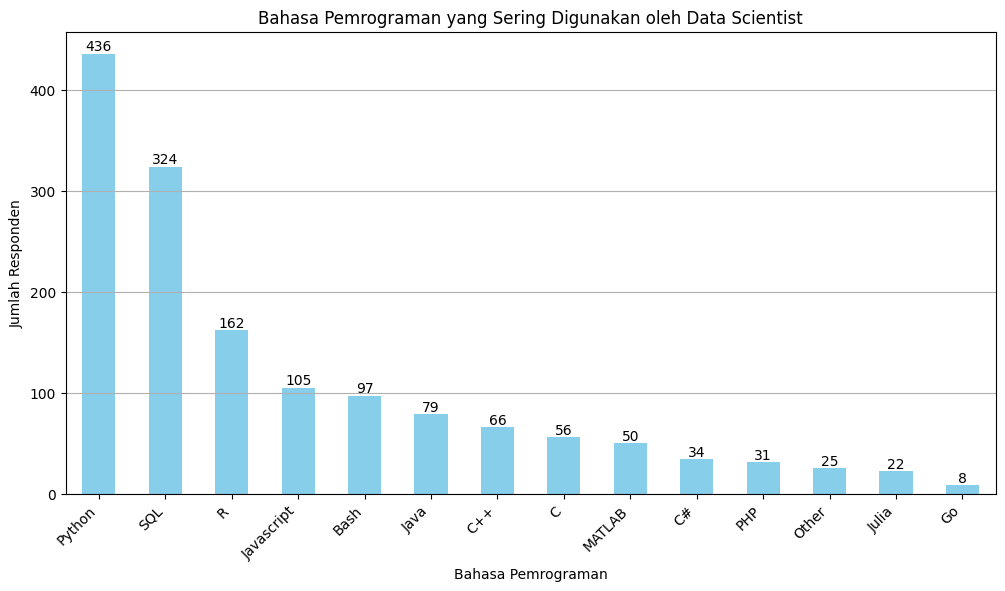

In [ ]:
# Cluster (2)

df2_DS2 = df22[df22['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q12_1 = df2_DS2['Q12_1'].value_counts()
Q12_2 = df2_DS2['Q12_2'].value_counts()
Q12_3 = df2_DS2['Q12_3'].value_counts()
Q12_4 = df2_DS2['Q12_4'].value_counts()
Q12_5 = df2_DS2['Q12_5'].value_counts()
Q12_6 = df2_DS2['Q12_6'].value_counts()
Q12_7 = df2_DS2['Q12_7'].value_counts()
Q12_8 = df2_DS2['Q12_8'].value_counts()
Q12_9 = df2_DS2['Q12_9'].value_counts()
Q12_10 = df2_DS2['Q12_10'].value_counts()
Q12_11 = df2_DS2['Q12_11'].value_counts()
Q12_12 = df2_DS2['Q12_12'].value_counts()
Q12_13 = df2_DS2['Q12_13'].value_counts()
Q12_14 = df2_DS2['Q12_14'].value_counts()
Q12_15 = df2_DS2['Q12_15'].value_counts()

Q12_DS2_Concat = pd.concat([Q12_1, Q12_2, Q12_3, Q12_4, Q12_5,
    Q12_6, Q12_7, Q12_8, Q12_9, Q12_10,
    Q12_11, Q12_12, Q12_13, Q12_14, Q12_15,
])

# Mengurutkan Q12_DS2_Concat dari terbesar ke terkecil
Q12_DS2_Concat_sorted = Q12_DS2_Concat.sort_values(ascending=False)

# Membuat histogram dari Q12_DS2_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q12_DS2_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Bahasa Pemrograman yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Bahasa Pemrograman')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q12_DS2_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Dari analsisis clustering di atas, Kita dapat mengetahui baik data scientist junior, intermediate, maupun senior mereka menggunakan bahasa pemrograman yang sama yaitu **Python** dan **SQL**

##  Data Visualization Libraries

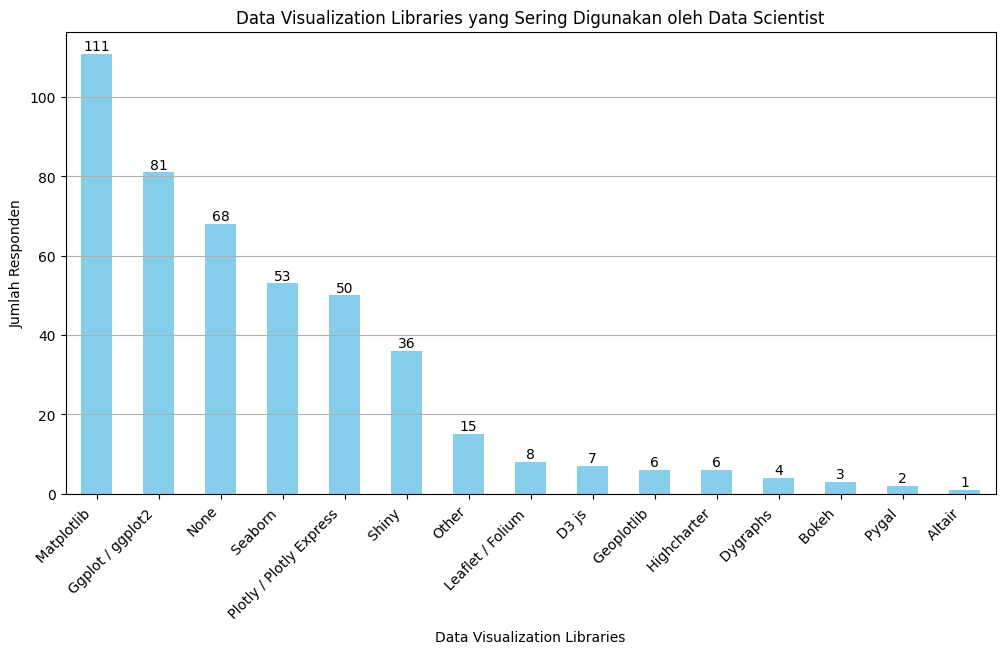

In [ ]:
# Cluster (0)

df2_DS0 = df00[df00['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q15_1 = df2_DS0['Q15_1'].value_counts()
Q15_2 = df2_DS0['Q15_2'].value_counts()
Q15_3 = df2_DS0['Q15_3'].value_counts()
Q15_4 = df2_DS0['Q15_4'].value_counts()
Q15_5 = df2_DS0['Q15_5'].value_counts()
Q15_6 = df2_DS0['Q15_6'].value_counts()
Q15_7 = df2_DS0['Q15_7'].value_counts()
Q15_8 = df2_DS0['Q15_8'].value_counts()
Q15_9 = df2_DS0['Q15_9'].value_counts()
Q15_10 = df2_DS0['Q15_10'].value_counts()
Q15_11 = df2_DS0['Q15_11'].value_counts()
Q15_12 = df2_DS0['Q15_12'].value_counts()
Q15_13 = df2_DS0['Q15_13'].value_counts()
Q15_14 = df2_DS0['Q15_14'].value_counts()
Q15_15 = df2_DS0['Q15_15'].value_counts()

Q15_DS0_Concat = pd.concat([Q15_1, Q15_2, Q15_3, Q15_4, Q15_5,
    Q15_6, Q15_7, Q15_8, Q15_9, Q15_10,
    Q15_11, Q15_12, Q15_13, Q15_14, Q15_15,
])

# Mengurutkan Q15_DS0_Concat dari terbesar ke terkecil
Q15_DS0_Concat_sorted = Q15_DS0_Concat.sort_values(ascending=False)

# Membuat histogram dari Q15_DS0_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q15_DS0_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Data Visualization Libraries yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q15_DS0_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

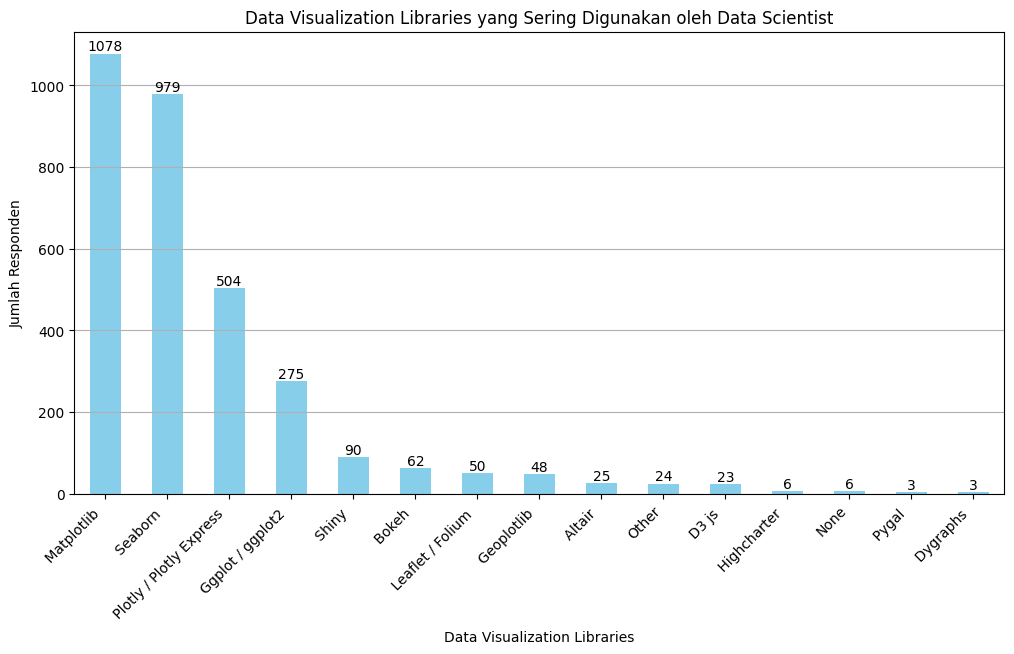

In [ ]:
# Cluster (1)

df2_DS1 = df11[df11['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q15_1 = df2_DS1['Q15_1'].value_counts()
Q15_2 = df2_DS1['Q15_2'].value_counts()
Q15_3 = df2_DS1['Q15_3'].value_counts()
Q15_4 = df2_DS1['Q15_4'].value_counts()
Q15_5 = df2_DS1['Q15_5'].value_counts()
Q15_6 = df2_DS1['Q15_6'].value_counts()
Q15_7 = df2_DS1['Q15_7'].value_counts()
Q15_8 = df2_DS1['Q15_8'].value_counts()
Q15_9 = df2_DS1['Q15_9'].value_counts()
Q15_10 = df2_DS1['Q15_10'].value_counts()
Q15_11 = df2_DS1['Q15_11'].value_counts()
Q15_12 = df2_DS1['Q15_12'].value_counts()
Q15_13 = df2_DS1['Q15_13'].value_counts()
Q15_14 = df2_DS1['Q15_14'].value_counts()
Q15_15 = df2_DS1['Q15_15'].value_counts()

Q15_DS1_Concat = pd.concat([Q15_1, Q15_2, Q15_3, Q15_4, Q15_5,
    Q15_6, Q15_7, Q15_8, Q15_9, Q15_10,
    Q15_11, Q15_12, Q15_13, Q15_14, Q15_15,
])

# Mengurutkan Q15_DS1_Concat dari terbesar ke terkecil
Q15_DS1_Concat_sorted = Q15_DS1_Concat.sort_values(ascending=False)

# Membuat histogram dari Q15_DS1_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q15_DS1_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Data Visualization Libraries yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q15_DS1_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

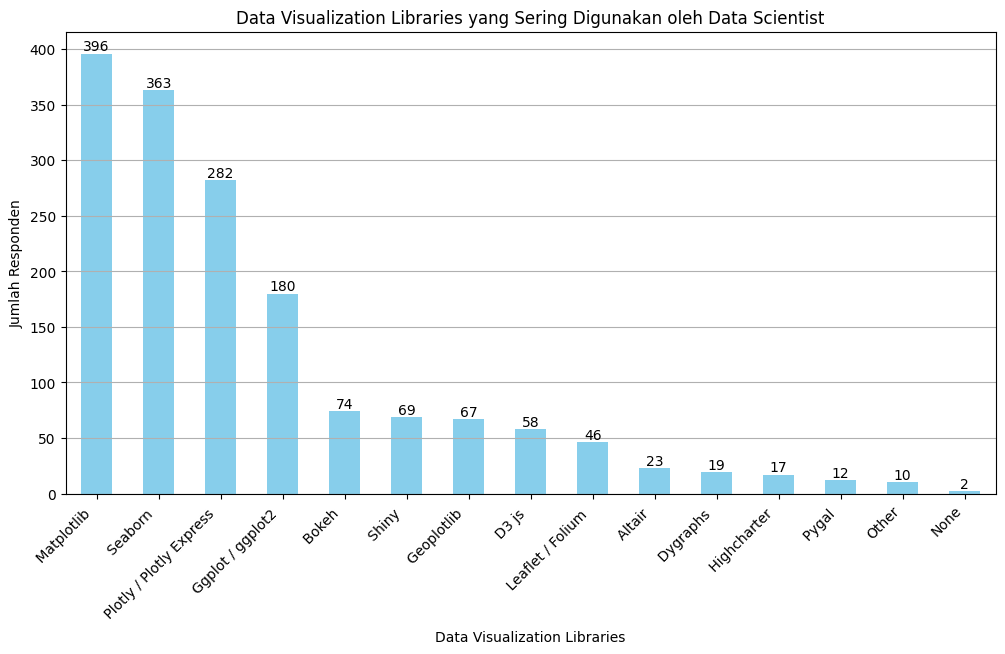

In [ ]:
# Cluster (2)

df2_DS2 = df22[df22['Q23']== 'Data Scientist']

# Gabungan Bahasa Pemrograman Data Scientist
Q15_1 = df2_DS2['Q15_1'].value_counts()
Q15_2 = df2_DS2['Q15_2'].value_counts()
Q15_3 = df2_DS2['Q15_3'].value_counts()
Q15_4 = df2_DS2['Q15_4'].value_counts()
Q15_5 = df2_DS2['Q15_5'].value_counts()
Q15_6 = df2_DS2['Q15_6'].value_counts()
Q15_7 = df2_DS2['Q15_7'].value_counts()
Q15_8 = df2_DS2['Q15_8'].value_counts()
Q15_9 = df2_DS2['Q15_9'].value_counts()
Q15_10 = df2_DS2['Q15_10'].value_counts()
Q15_11 = df2_DS2['Q15_11'].value_counts()
Q15_12 = df2_DS2['Q15_12'].value_counts()
Q15_13 = df2_DS2['Q15_13'].value_counts()
Q15_14 = df2_DS2['Q15_14'].value_counts()
Q15_15 = df2_DS2['Q15_15'].value_counts()

Q15_DS2_Concat = pd.concat([Q15_1, Q15_2, Q15_3, Q15_4, Q15_5,
    Q15_6, Q15_7, Q15_8, Q15_9, Q15_10,
    Q15_11, Q15_12, Q15_13, Q15_14, Q15_15,
])

# Mengurutkan Q15_DS2_Concat dari terbesar ke terkecil
Q15_DS2_Concat_sorted = Q15_DS2_Concat.sort_values(ascending=False)

# Membuat histogram dari Q15_DS2_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q15_DS2_Concat_sorted.plot(kind='bar', color='skyblue')
plt.title('Data Visualization Libraries yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q15_DS2_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Dari hasil analisis clustering, pada junior maupun senior data scientist Data Visualization yang sering di gunakan adalah **Matplotlib**, **Seaborn**, dan **Plotly**. tetapi pada kelas intermediate data scientist masih menggunakan **Ggplot**

## Framework

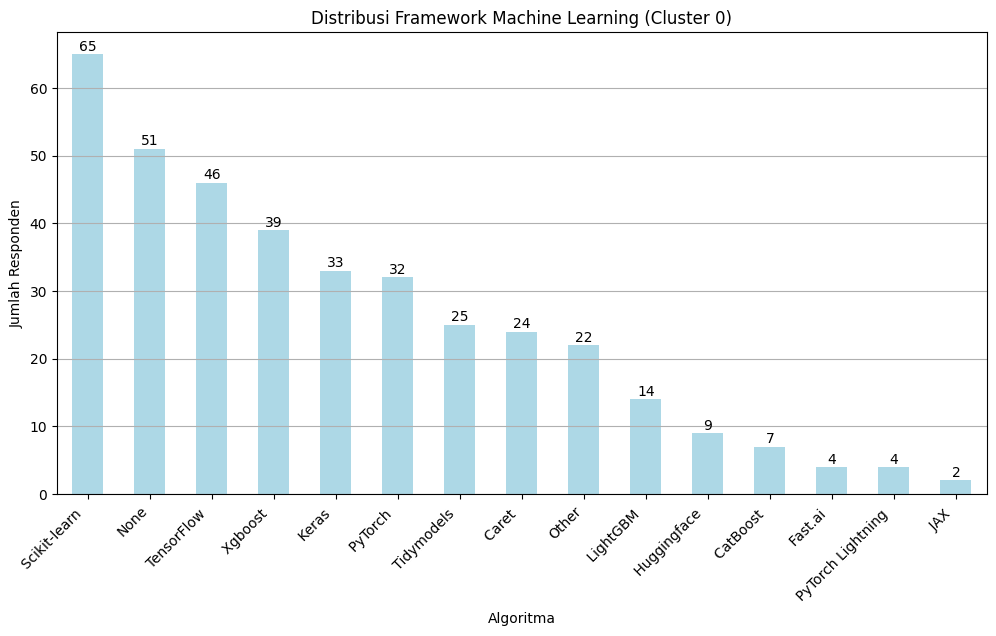

In [ ]:
# Cluster (0)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS0 = df00[df00['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q17_1 = df2_DS0['Q17_1'].value_counts()
Q17_2 = df2_DS0['Q17_2'].value_counts()
Q17_3 = df2_DS0['Q17_3'].value_counts()
Q17_4 = df2_DS0['Q17_4'].value_counts()
Q17_5 = df2_DS0['Q17_5'].value_counts()
Q17_6 = df2_DS0['Q17_6'].value_counts()
Q17_7 = df2_DS0['Q17_7'].value_counts()
Q17_8 = df2_DS0['Q17_8'].value_counts()
Q17_9 = df2_DS0['Q17_9'].value_counts()
Q17_10 = df2_DS0['Q17_10'].value_counts()
Q17_11 = df2_DS0['Q17_11'].value_counts()
Q17_12 = df2_DS0['Q17_12'].value_counts()
Q17_13 = df2_DS0['Q17_13'].value_counts()
Q17_14 = df2_DS0['Q17_14'].value_counts()
Q17_15 = df2_DS0['Q17_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q17_DS0_Concat = pd.concat([Q17_1, Q17_2, Q17_3, Q17_4, Q17_5,
    Q17_6, Q17_7, Q17_8, Q17_9, Q17_10,
    Q17_11, Q17_12, Q17_13, Q17_14, Q17_15,
])

# Mengurutkan Q17_DS0_Concat dari terbesar ke terkecil
Q17_DS0_Concat_sorted = Q17_DS0_Concat.sort_values(ascending=False)

# Membuat histogram dari Q17_DS0_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q17_DS0_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Distribusi Framework Machine Learning (Cluster 0)')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q17_DS0_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

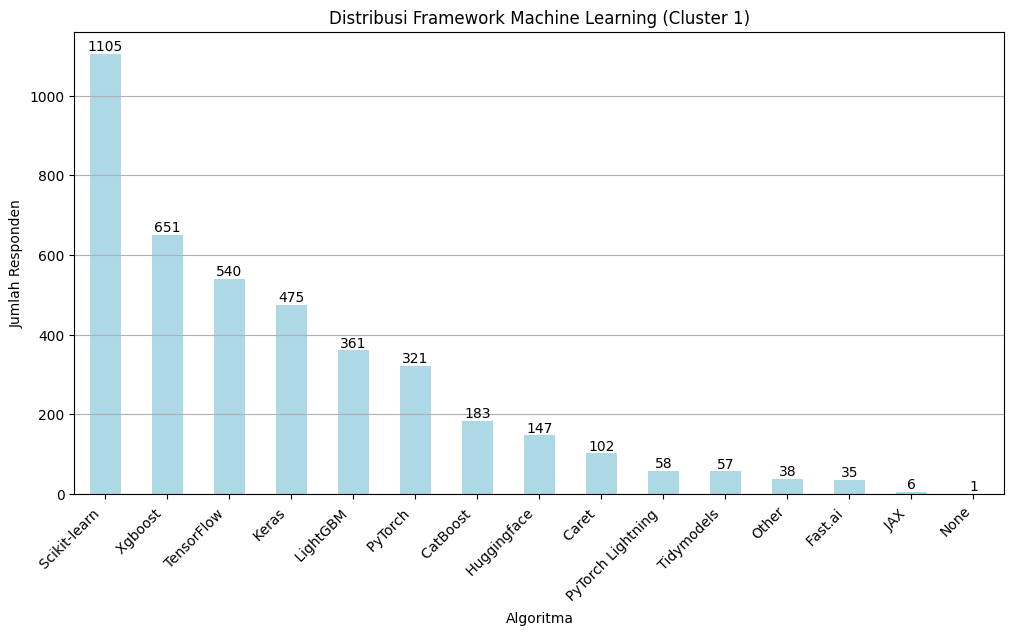

In [ ]:
# Cluster (1)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS1 = df11[df11['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q17_1 = df2_DS1['Q17_1'].value_counts()
Q17_2 = df2_DS1['Q17_2'].value_counts()
Q17_3 = df2_DS1['Q17_3'].value_counts()
Q17_4 = df2_DS1['Q17_4'].value_counts()
Q17_5 = df2_DS1['Q17_5'].value_counts()
Q17_6 = df2_DS1['Q17_6'].value_counts()
Q17_7 = df2_DS1['Q17_7'].value_counts()
Q17_8 = df2_DS1['Q17_8'].value_counts()
Q17_9 = df2_DS1['Q17_9'].value_counts()
Q17_10 = df2_DS1['Q17_10'].value_counts()
Q17_11 = df2_DS1['Q17_11'].value_counts()
Q17_12 = df2_DS1['Q17_12'].value_counts()
Q17_13 = df2_DS1['Q17_13'].value_counts()
Q17_14 = df2_DS1['Q17_14'].value_counts()
Q17_15 = df2_DS1['Q17_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q17_DS1_Concat = pd.concat([Q17_1, Q17_2, Q17_3, Q17_4, Q17_5,
    Q17_6, Q17_7, Q17_8, Q17_9, Q17_10,
    Q17_11, Q17_12, Q17_13, Q17_14, Q17_15,
])

# Mengurutkan Q17_DS1_Concat dari terbesar ke terkecil
Q17_DS1_Concat_sorted = Q17_DS1_Concat.sort_values(ascending=False)

# Membuat histogram dari Q17_DS1_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q17_DS1_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Distribusi Framework Machine Learning (Cluster 1)')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q17_DS1_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

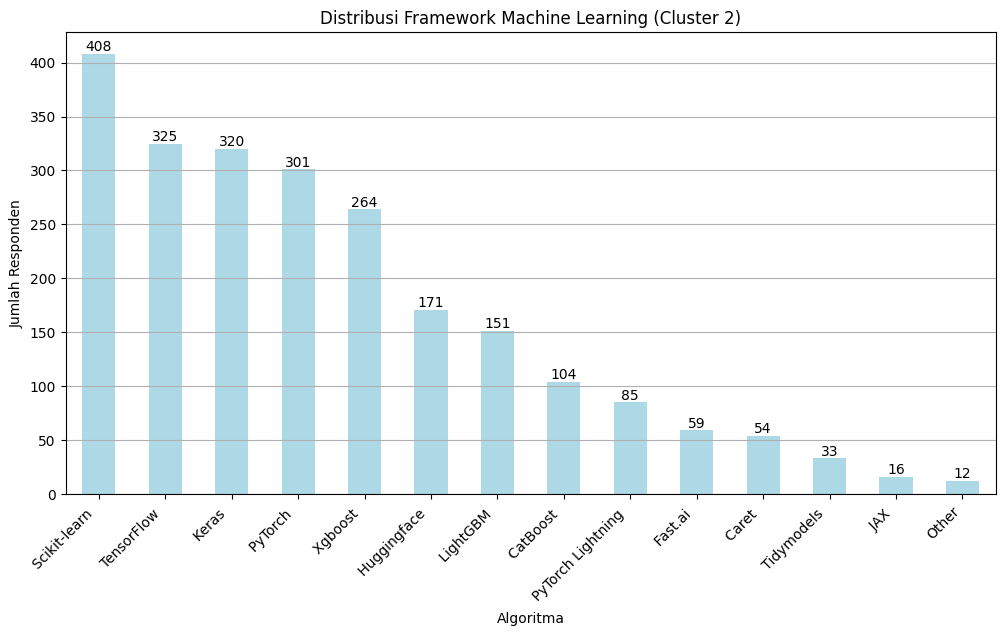

In [ ]:
# Cluster (2)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS2 = df22[df22['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q17_1 = df2_DS2['Q17_1'].value_counts()
Q17_2 = df2_DS2['Q17_2'].value_counts()
Q17_3 = df2_DS2['Q17_3'].value_counts()
Q17_4 = df2_DS2['Q17_4'].value_counts()
Q17_5 = df2_DS2['Q17_5'].value_counts()
Q17_6 = df2_DS2['Q17_6'].value_counts()
Q17_7 = df2_DS2['Q17_7'].value_counts()
Q17_8 = df2_DS2['Q17_8'].value_counts()
Q17_9 = df2_DS2['Q17_9'].value_counts()
Q17_10 = df2_DS2['Q17_10'].value_counts()
Q17_11 = df2_DS2['Q17_11'].value_counts()
Q17_12 = df2_DS2['Q17_12'].value_counts()
Q17_13 = df2_DS2['Q17_13'].value_counts()
Q17_14 = df2_DS2['Q17_14'].value_counts()
Q17_15 = df2_DS2['Q17_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q17_DS2_Concat = pd.concat([Q17_1, Q17_2, Q17_3, Q17_4, Q17_5,
    Q17_6, Q17_7, Q17_8, Q17_9, Q17_10,
    Q17_11, Q17_12, Q17_13, Q17_14, Q17_15,
])

# Mengurutkan Q17_DS2_Concat dari terbesar ke terkecil
Q17_DS2_Concat_sorted = Q17_DS2_Concat.sort_values(ascending=False)

# Membuat histogram dari Q17_DS2_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q17_DS2_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Distribusi Framework Machine Learning (Cluster 2)')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q17_DS2_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Berdasarkan hasil clustering, baik junior data scientist maupun intermediate data scientist, umumnya menggunakan framework seperti **Scikit-learn**, **Xgboost**, dan **TensorFlow** dalam pekerjaan machine learning mereka. Meskipun demikian, pada tingkat senior data scientist, terlihat adanya perbedaan di mana **PyTorch** menjadi framework yang lebih dominan. Oleh karena itu, dapat dianggap bahwa pemilihan framework cenderung berubah seiring dengan peningkatan tingkat pengalaman, dengan PyTorch menjadi lebih populer pada tingkat senior.

## Algoritma

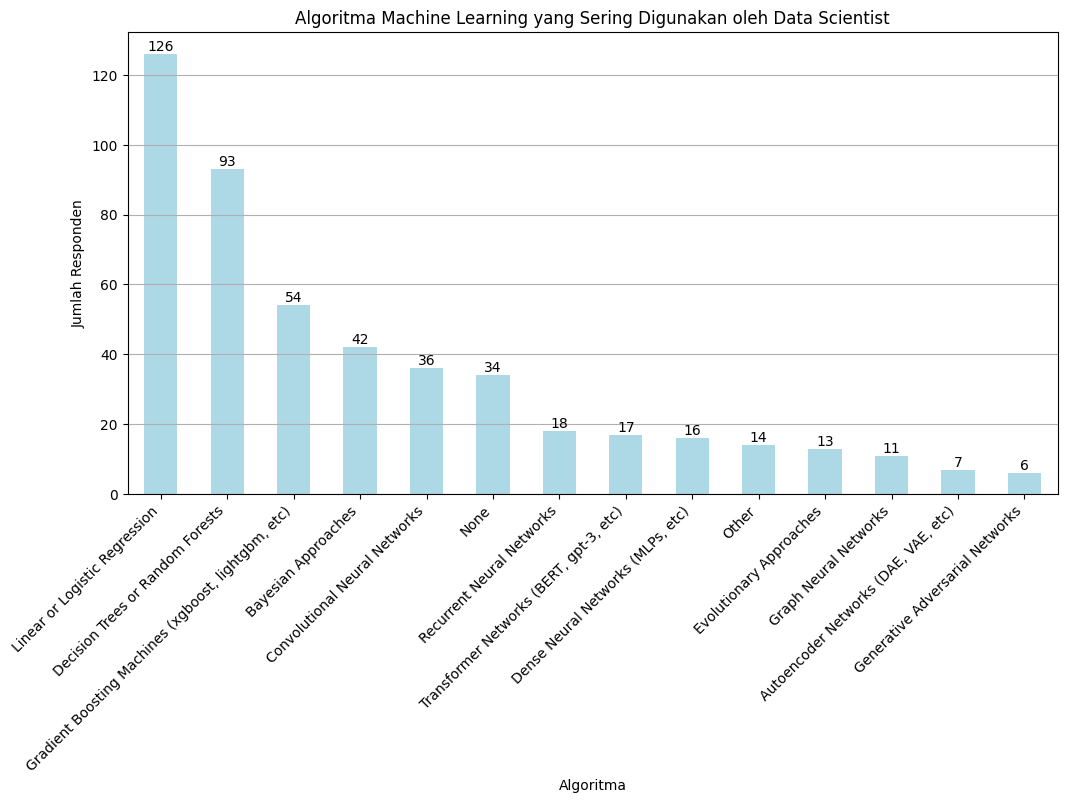

In [ ]:
# Cluster 0
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS00 = df00[df00['Q23']== 'Data Scientist']

# Data masing-masing Algoritma Machine Learning yang dipakai Data Scientist'
Q18_1 = df2_DS00['Q18_1'].value_counts()
Q18_2 = df2_DS00['Q18_2'].value_counts()
Q18_3 = df2_DS00['Q18_3'].value_counts()
Q18_4 = df2_DS00['Q18_4'].value_counts()
Q18_5 = df2_DS00['Q18_5'].value_counts()
Q18_6 = df2_DS00['Q18_6'].value_counts()
Q18_7 = df2_DS00['Q18_7'].value_counts()
Q18_8 = df2_DS00['Q18_8'].value_counts()
Q18_9 = df2_DS00['Q18_9'].value_counts()
Q18_10 = df2_DS00['Q18_10'].value_counts()
Q18_11 = df2_DS00['Q18_11'].value_counts()
Q18_12 = df2_DS00['Q18_12'].value_counts()
Q18_13 = df2_DS00['Q18_13'].value_counts()
Q18_14 = df2_DS00['Q18_14'].value_counts()

# Gabungan Algoritma Machine Learning yang dipakai
Q18_DS00_Concat = pd.concat([Q18_1, Q18_2, Q18_3, Q18_4, Q18_5,
    Q18_6, Q18_7, Q18_8, Q18_9, Q18_10,
    Q18_11, Q18_12, Q18_13, Q18_14,
])

# Mengurutkan Q18_DS00_Concat dari terbesar ke terkecil
Q18_DS00_Concat_sorted = Q18_DS00_Concat.sort_values(ascending=False)

# Membuat histogram dari Q18_DS00_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q18_DS00_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q18_DS00_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

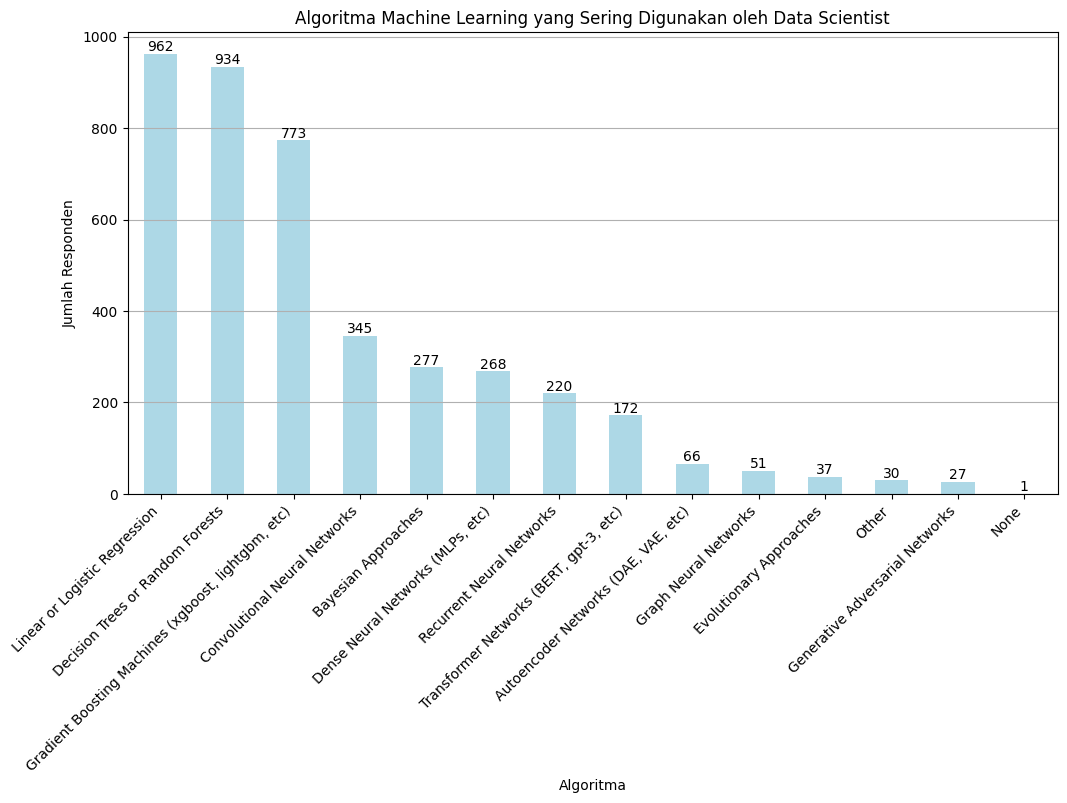

In [ ]:
# Cluster 1
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS11 = df11[df11['Q23']== 'Data Scientist']

# Data masing-masing Algoritma Machine Learning yang dipakai Data Scientist'
Q18_1 = df2_DS11['Q18_1'].value_counts()
Q18_2 = df2_DS11['Q18_2'].value_counts()
Q18_3 = df2_DS11['Q18_3'].value_counts()
Q18_4 = df2_DS11['Q18_4'].value_counts()
Q18_5 = df2_DS11['Q18_5'].value_counts()
Q18_6 = df2_DS11['Q18_6'].value_counts()
Q18_7 = df2_DS11['Q18_7'].value_counts()
Q18_8 = df2_DS11['Q18_8'].value_counts()
Q18_9 = df2_DS11['Q18_9'].value_counts()
Q18_10 = df2_DS11['Q18_10'].value_counts()
Q18_11 = df2_DS11['Q18_11'].value_counts()
Q18_12 = df2_DS11['Q18_12'].value_counts()
Q18_13 = df2_DS11['Q18_13'].value_counts()
Q18_14 = df2_DS11['Q18_14'].value_counts()

# Gabungan Algoritma Machine Learning yang dipakai
Q18_DS11_Concat = pd.concat([Q18_1, Q18_2, Q18_3, Q18_4, Q18_5,
    Q18_6, Q18_7, Q18_8, Q18_9, Q18_10,
    Q18_11, Q18_12, Q18_13, Q18_14,
])

# Mengurutkan Q18_DS11_Concat dari terbesar ke terkecil
Q18_DS11_Concat_sorted = Q18_DS11_Concat.sort_values(ascending=False)

# Membuat histogram dari Q18_DS11_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q18_DS11_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q18_DS11_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

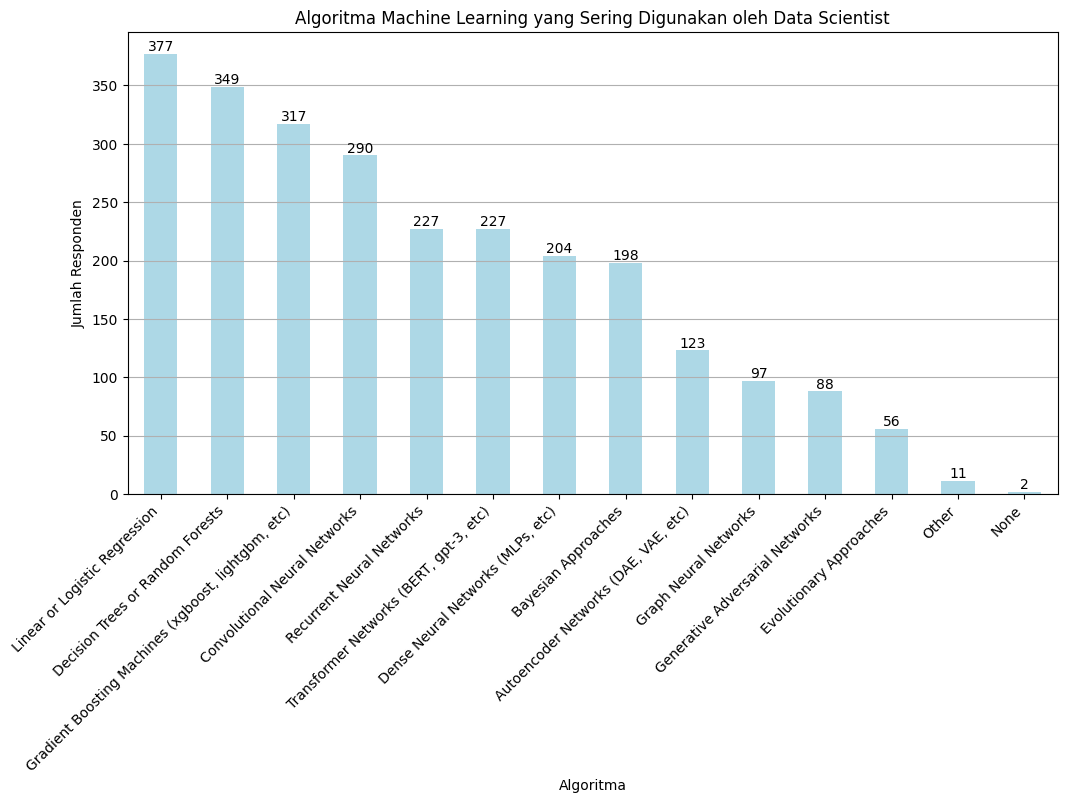

In [ ]:
# Cluster 2
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS22 = df22[df22['Q23']== 'Data Scientist']

# Data masing-masing Algoritma Machine Learning yang dipakai Data Scientist'
Q18_1 = df2_DS22['Q18_1'].value_counts()
Q18_2 = df2_DS22['Q18_2'].value_counts()
Q18_3 = df2_DS22['Q18_3'].value_counts()
Q18_4 = df2_DS22['Q18_4'].value_counts()
Q18_5 = df2_DS22['Q18_5'].value_counts()
Q18_6 = df2_DS22['Q18_6'].value_counts()
Q18_7 = df2_DS22['Q18_7'].value_counts()
Q18_8 = df2_DS22['Q18_8'].value_counts()
Q18_9 = df2_DS22['Q18_9'].value_counts()
Q18_10 = df2_DS22['Q18_10'].value_counts()
Q18_11 = df2_DS22['Q18_11'].value_counts()
Q18_12 = df2_DS22['Q18_12'].value_counts()
Q18_13 = df2_DS22['Q18_13'].value_counts()
Q18_14 = df2_DS22['Q18_14'].value_counts()

# Gabungan Algoritma Machine Learning yang dipakai
Q18_DS22_Concat = pd.concat([Q18_1, Q18_2, Q18_3, Q18_4, Q18_5,
    Q18_6, Q18_7, Q18_8, Q18_9, Q18_10,
    Q18_11, Q18_12, Q18_13, Q18_14,
])

# Mengurutkan Q18_DS22_Concat dari terbesar ke terkecil
Q18_DS22_Concat_sorted = Q18_DS22_Concat.sort_values(ascending=False)

# Membuat histogram dari Q18_DS22_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q18_DS22_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Algoritma Machine Learning yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Algoritma')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q18_DS22_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Dari hasil analisis clustering, dapat disimpulkan bahwa pada setiap tingkatan data scientist algoritma Machine Learning yang sering diguanakan adalah **Linear Regression**, **Decision Trees**, dan **Gradient Boosting Machines**

## Data Products

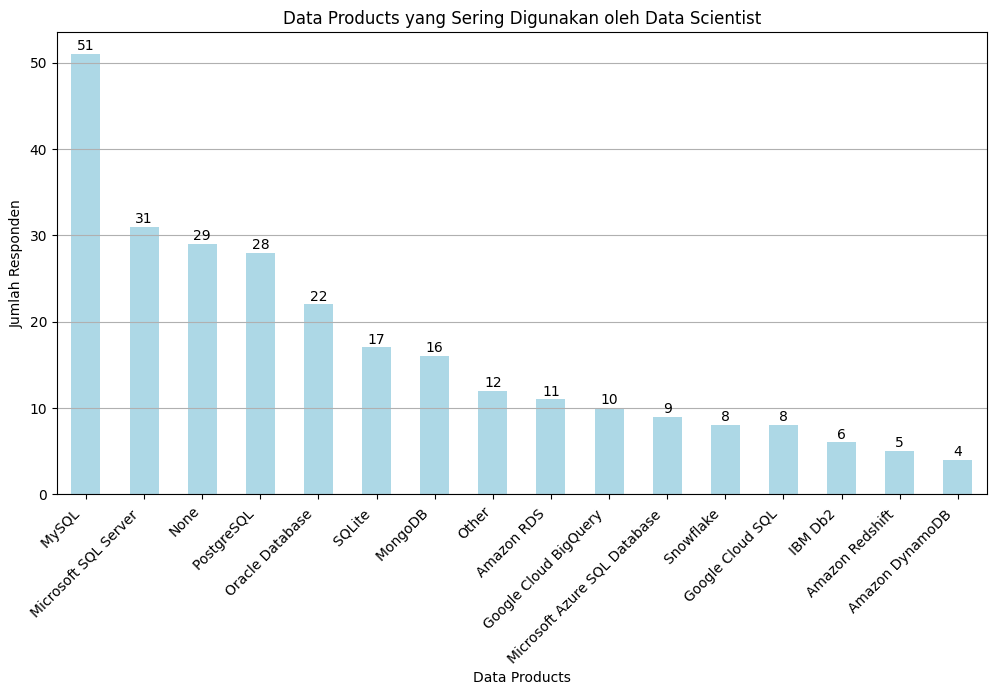

In [ ]:
# CLuster (0)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS0 = df00[df00['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q35_1 = df2_DS0['Q35_1'].value_counts()
Q35_2 = df2_DS0['Q35_2'].value_counts()
Q35_3 = df2_DS0['Q35_3'].value_counts()
Q35_4 = df2_DS0['Q35_4'].value_counts()
Q35_5 = df2_DS0['Q35_5'].value_counts()
Q35_6 = df2_DS0['Q35_6'].value_counts()
Q35_7 = df2_DS0['Q35_7'].value_counts()
Q35_8 = df2_DS0['Q35_8'].value_counts()
Q35_9 = df2_DS0['Q35_9'].value_counts()
Q35_10 = df2_DS0['Q35_10'].value_counts()
Q35_11 = df2_DS0['Q35_11'].value_counts()
Q35_12 = df2_DS0['Q35_12'].value_counts()
Q35_13 = df2_DS0['Q35_13'].value_counts()
Q35_14 = df2_DS0['Q35_14'].value_counts()
Q35_15 = df2_DS0['Q35_15'].value_counts()
Q35_16 = df2_DS0['Q35_16'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q35_DS0_Concat = pd.concat([Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,
    Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,
    Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,
    Q35_16
])

# Mengurutkan Q35_DS0_Concat dari terbesar ke terkecil
Q35_DS0_Concat_sorted = Q35_DS0_Concat.sort_values(ascending=False)

# Membuat histogram dari Q35_DS0_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q35_DS0_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Data Products yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Products')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q35_DS0_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

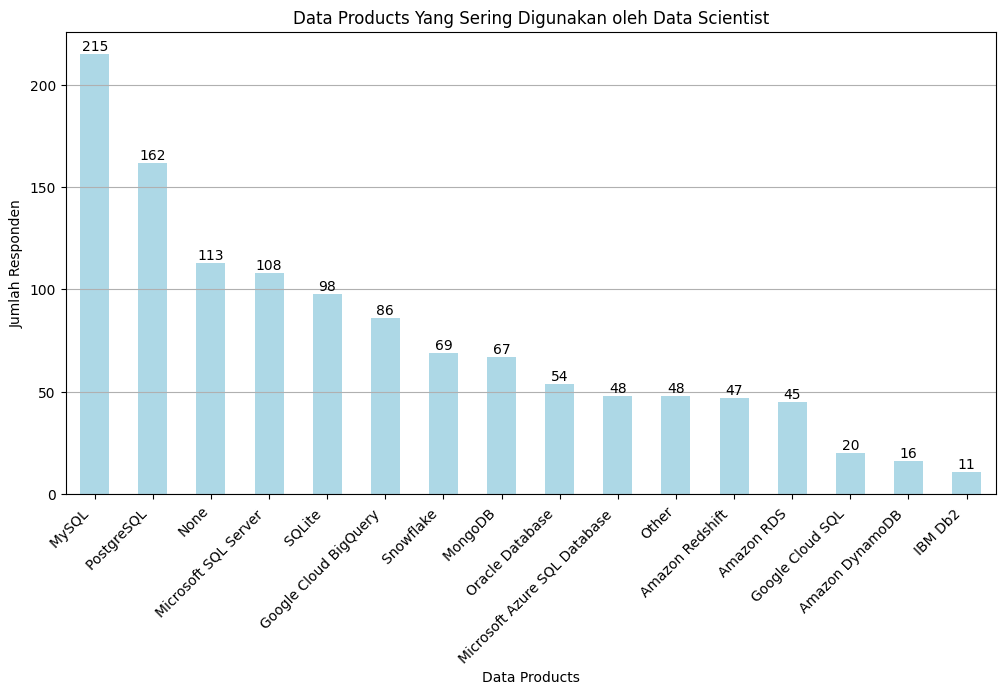

In [ ]:
# CLuster (1)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS1 = df11[df11['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q35_1 = df2_DS1['Q35_1'].value_counts()
Q35_2 = df2_DS1['Q35_2'].value_counts()
Q35_3 = df2_DS1['Q35_3'].value_counts()
Q35_4 = df2_DS1['Q35_4'].value_counts()
Q35_5 = df2_DS1['Q35_5'].value_counts()
Q35_6 = df2_DS1['Q35_6'].value_counts()
Q35_7 = df2_DS1['Q35_7'].value_counts()
Q35_8 = df2_DS1['Q35_8'].value_counts()
Q35_9 = df2_DS1['Q35_9'].value_counts()
Q35_10 = df2_DS1['Q35_10'].value_counts()
Q35_11 = df2_DS1['Q35_11'].value_counts()
Q35_12 = df2_DS1['Q35_12'].value_counts()
Q35_13 = df2_DS1['Q35_13'].value_counts()
Q35_14 = df2_DS1['Q35_14'].value_counts()
Q35_15 = df2_DS1['Q35_15'].value_counts()
Q35_16 = df2_DS1['Q35_16'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q35_DS1_Concat = pd.concat([Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,
    Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,
    Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,
    Q35_16
])

# Mengurutkan Q35_DS1_Concat dari terbesar ke terkecil
Q35_DS1_Concat_sorted = Q35_DS1_Concat.sort_values(ascending=False)

# Membuat histogram dari Q35_DS1_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q35_DS1_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Data Products Yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Products')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q35_DS1_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

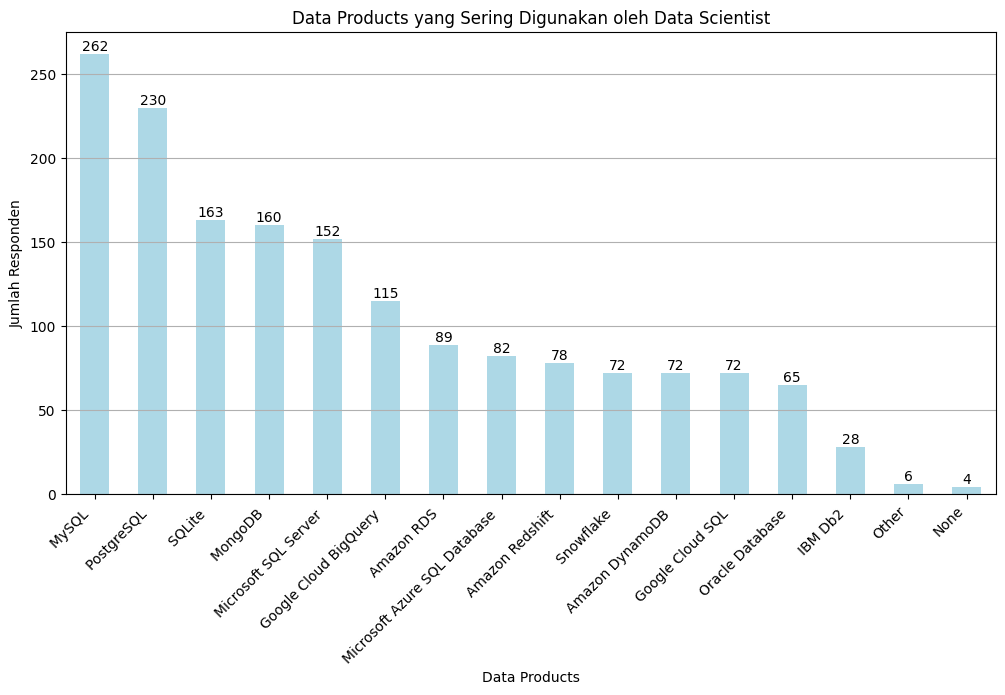

In [ ]:
# Cluster (2)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS2 = df22[df22['Q23']== 'Data Scientist']

# Data masing-masing Framework Machine Learning yang dipakai Data Scientist
Q35_1 = df2_DS2['Q35_1'].value_counts()
Q35_2 = df2_DS2['Q35_2'].value_counts()
Q35_3 = df2_DS2['Q35_3'].value_counts()
Q35_4 = df2_DS2['Q35_4'].value_counts()
Q35_5 = df2_DS2['Q35_5'].value_counts()
Q35_6 = df2_DS2['Q35_6'].value_counts()
Q35_7 = df2_DS2['Q35_7'].value_counts()
Q35_8 = df2_DS2['Q35_8'].value_counts()
Q35_9 = df2_DS2['Q35_9'].value_counts()
Q35_10 = df2_DS2['Q35_10'].value_counts()
Q35_11 = df2_DS2['Q35_11'].value_counts()
Q35_12 = df2_DS2['Q35_12'].value_counts()
Q35_13 = df2_DS2['Q35_13'].value_counts()
Q35_14 = df2_DS2['Q35_14'].value_counts()
Q35_15 = df2_DS2['Q35_15'].value_counts()
Q35_16 = df2_DS2['Q35_16'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q35_DS2_Concat = pd.concat([Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,
    Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,
    Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,
    Q35_16
])

# Mengurutkan Q35_DS2_Concat dari terbesar ke terkecil
Q35_DS2_Concat_sorted = Q35_DS2_Concat.sort_values(ascending=False)

# Membuat histogram dari Q35_DS2_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q35_DS2_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Data Products yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Data Products')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q35_DS2_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Dari analisis clustering, pada tingkat junior dan intermediate Data Products yang sering digunakan adalah **MySQL**, **PostgreSQL**, dan **Microsoft SQL Server**. akan tetapi pada senior data scientist mereka menggunakan SQLite juga sebagai Data Products

## Business Intelligence Tools

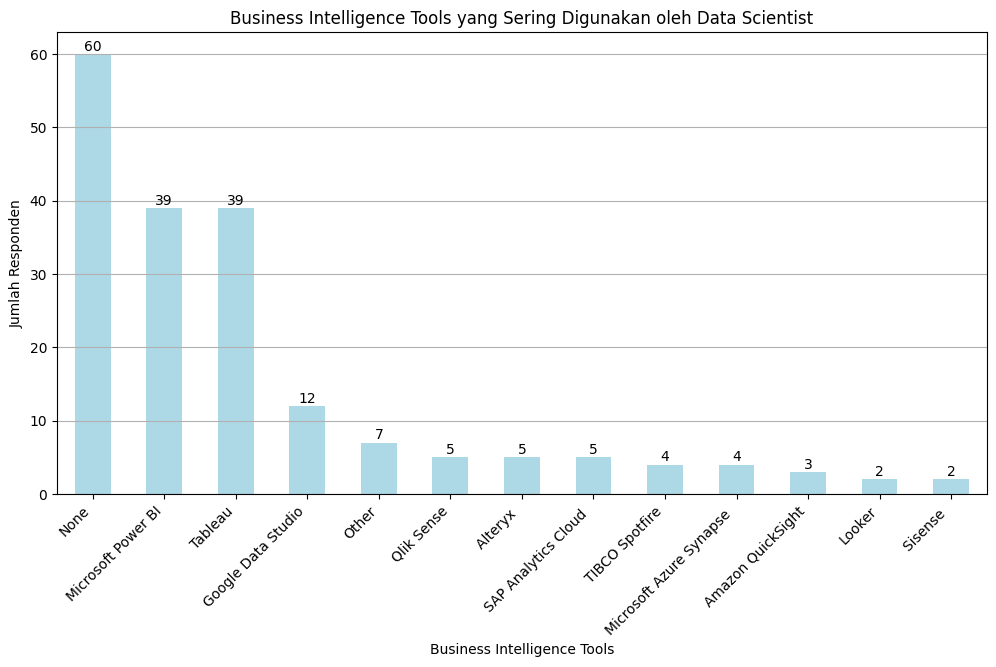

In [ ]:
# Cluster (0)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS0 = df00[df00['Q23']== 'Data Scientist']

# Data masing-masing Alat business intelligence yang dipakai Data Scientist
Q36_1 = df2_DS0['Q36_1'].value_counts()
Q36_2 = df2_DS0['Q36_2'].value_counts()
Q36_3 = df2_DS0['Q36_3'].value_counts()
Q36_4 = df2_DS0['Q36_4'].value_counts()
Q36_5 = df2_DS0['Q36_5'].value_counts()
Q36_6 = df2_DS0['Q36_6'].value_counts()
Q36_7 = df2_DS0['Q36_7'].value_counts()
Q36_8 = df2_DS0['Q36_8'].value_counts()
Q36_9 = df2_DS0['Q36_9'].value_counts()
Q36_10 = df2_DS0['Q36_10'].value_counts()
Q36_11 = df2_DS0['Q36_11'].value_counts()
Q36_12 = df2_DS0['Q36_12'].value_counts()
Q36_13 = df2_DS0['Q36_13'].value_counts()
Q36_14 = df2_DS0['Q36_14'].value_counts()
Q36_15 = df2_DS0['Q36_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q36_DS0_Concat = pd.concat([Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,
    Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,
    Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,
])

# Mengurutkan Q36_DS0_Concat dari terbesar ke terkecil
Q36_DS0_Concat_sorted = Q36_DS0_Concat.sort_values(ascending=False)

# Membuat histogram dari Q36_DS0_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q36_DS0_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Business Intelligence Tools yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Business Intelligence Tools')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q36_DS0_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

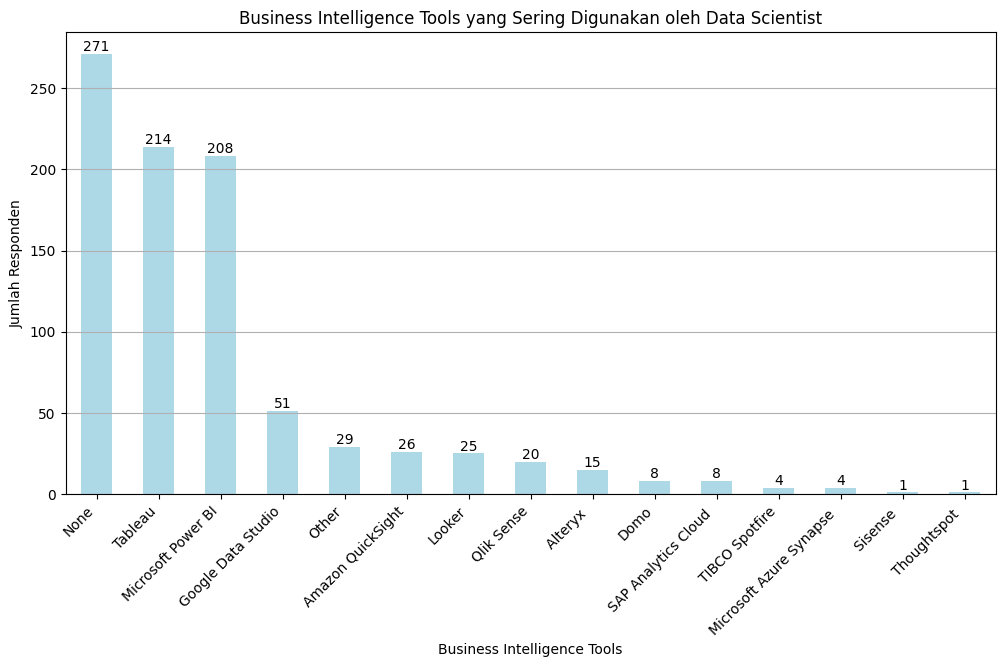

In [ ]:
# Cluster 1
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS1 = df11[df11['Q23']== 'Data Scientist']

# Data masing-masing Alat business intelligence yang dipakai Data Scientist
Q36_1 = df2_DS1['Q36_1'].value_counts()
Q36_2 = df2_DS1['Q36_2'].value_counts()
Q36_3 = df2_DS1['Q36_3'].value_counts()
Q36_4 = df2_DS1['Q36_4'].value_counts()
Q36_5 = df2_DS1['Q36_5'].value_counts()
Q36_6 = df2_DS1['Q36_6'].value_counts()
Q36_7 = df2_DS1['Q36_7'].value_counts()
Q36_8 = df2_DS1['Q36_8'].value_counts()
Q36_9 = df2_DS1['Q36_9'].value_counts()
Q36_10 = df2_DS1['Q36_10'].value_counts()
Q36_11 = df2_DS1['Q36_11'].value_counts()
Q36_12 = df2_DS1['Q36_12'].value_counts()
Q36_13 = df2_DS1['Q36_13'].value_counts()
Q36_14 = df2_DS1['Q36_14'].value_counts()
Q36_15 = df2_DS1['Q36_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q36_DS1_Concat = pd.concat([Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,
    Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,
    Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,
])

# Mengurutkan Q36_DS1_Concat dari terbesar ke terkecil
Q36_DS1_Concat_sorted = Q36_DS1_Concat.sort_values(ascending=False)

# Membuat histogram dari Q36_DS1_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q36_DS1_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Business Intelligence Tools yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Business Intelligence Tools')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q36_DS1_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

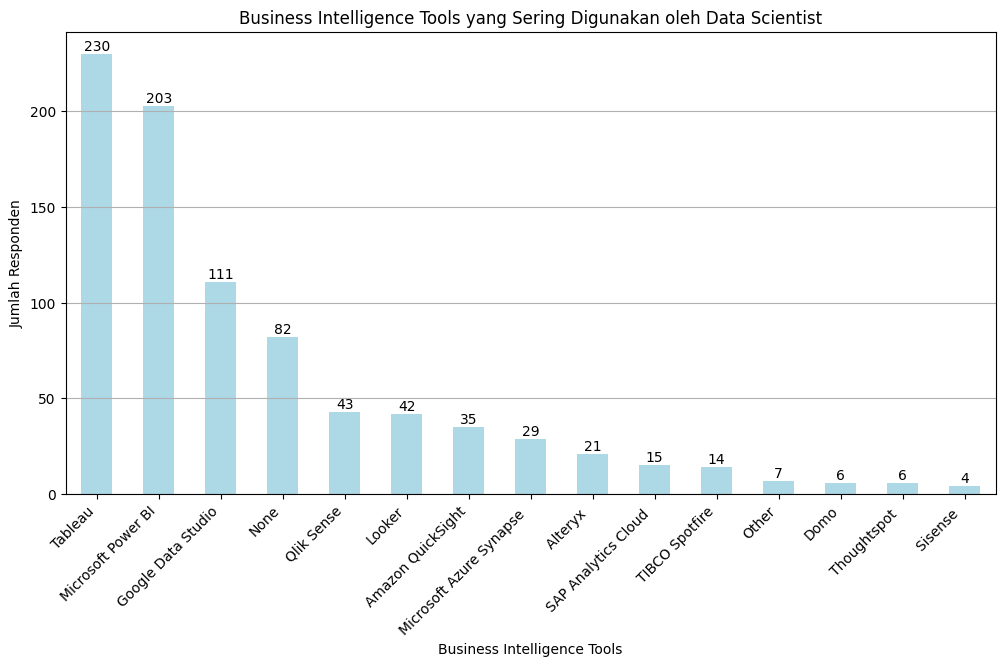

In [ ]:
# Cluster (2)
# hanya mengambil Q23 yang bernilai 'Data Scientist'
df2_DS02 = df22[df22['Q23']== 'Data Scientist']

# Data masing-masing Alat business intelligence yang dipakai Data Scientist
Q36_1 = df2_DS02['Q36_1'].value_counts()
Q36_2 = df2_DS02['Q36_2'].value_counts()
Q36_3 = df2_DS02['Q36_3'].value_counts()
Q36_4 = df2_DS02['Q36_4'].value_counts()
Q36_5 = df2_DS02['Q36_5'].value_counts()
Q36_6 = df2_DS02['Q36_6'].value_counts()
Q36_7 = df2_DS02['Q36_7'].value_counts()
Q36_8 = df2_DS02['Q36_8'].value_counts()
Q36_9 = df2_DS02['Q36_9'].value_counts()
Q36_10 = df2_DS02['Q36_10'].value_counts()
Q36_11 = df2_DS02['Q36_11'].value_counts()
Q36_12 = df2_DS02['Q36_12'].value_counts()
Q36_13 = df2_DS02['Q36_13'].value_counts()
Q36_14 = df2_DS02['Q36_14'].value_counts()
Q36_15 = df2_DS02['Q36_15'].value_counts()

# Gabungan Framework Machine Learning yang dipakai
Q36_DS02_Concat = pd.concat([Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,
    Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,
    Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,
])

# Mengurutkan Q36_DS02_Concat dari terbesar ke terkecil
Q36_DS02_Concat_sorted = Q36_DS02_Concat.sort_values(ascending=False)

# Membuat histogram dari Q36_DS02_Concat yang sudah diurutkan
plt.figure(figsize=(12, 6))
Q36_DS02_Concat_sorted.plot(kind='bar', color='lightblue')
plt.title('Business Intelligence Tools yang Sering Digunakan oleh Data Scientist')
plt.xlabel('Business Intelligence Tools')
plt.ylabel('Jumlah Responden')
plt.grid(axis='y')

# Mengatur label x
plt.xticks(rotation=45, ha='right')  # Rotasi label x sebesar 45 derajat dan rata kanan

# Menambahkan label nilai pada masing-masing batang
for i, value in enumerate(Q36_DS02_Concat_sorted):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Interpretasi :**

* Dari hasil analisis clustering, **Tableau** dan **Microsoft Power BI** merupakan business intelligence tools yang sering digunakan  untuk mengumpulkan, mengelola, menganalisis, dan menyajikan data seorang data scientist

# **Kesimpulan dan Saran**


* Data scientist memiliki peran utama dalam mengembangkan prototipe dan menerapkan pembelajaran mesin ke area baru, dengan fokus pada eksperimen, iterasi, dan pembangunan layanan ML yang dapat meningkatkan produk atau alur kerja secara operasional. Sebaliknya, data analyst cenderung lebih terfokus pada analisis data dan pelaporan tanpa penekanan yang sama pada keahlian pembelajaran mesin.

* Pelatihan yang sebaiknya diberikan oleh perusahaan kepada seorang Data Analyst untuk memiliki skill set seperti Data Scientist:
1.   **Pembelajaran Framework Machine Learning:**
> Framework Machine Learning seperti **scikit-learn**, **XGBoost**, dan **TensorFlow** dapat memberikan pemahaman yang kokoh tentang pengembangan, pelatihan, dan implementasi model machine learning. Ini penting untuk meningkatkan efisiensi dalam bekerja dengan model ML.
2.   **Pembelajaran Algoritma Machine Learning:**
> Algoritma Machine Learning, termasuk **Linear Regression**, **Decision Trees**, dan **Gradient Boosting Machines**, perlu dipahami agar seorang Data Analyst dapat memilih, mengembangkan, dan mengevaluasi model dengan efektif.
3. **Pelatihan mengenai Data Products:**
> Pengetahuan tentang Data Products, terutama menggunakan penyimpanan data seperti MySQL dan PostgreSQL, membantu Data Analyst dalam mengelola, mengakses, dan menganalisis data secara efisien.
4. **Pelatihan mengenai Business Intelligence Tools:**
> Business Intelligence Tools seperti Tableau dan Power BI dapat meningkatkan efektivitas analisis data dengan menyediakan visualisasi yang kuat dan kemampuan pelaporan. Ini membantu Data Analyst dalam menyajikan temuan mereka dengan cara yang lebih jelas dan mudah dimengerti.


